# Two Technical Test 
## Notebook 2/3 Exploratory data analysis

by: __Alexander Cox__

This notebook contains the steps I took to explore the data

__Notebook Contents__

1. [EDA and distributions](#eda)
2. [Univariate and Bivariate Analysis](#num)
3. [Correlation Analysis](#cat)
4. [Conclusions](#conc)

## Importing libraries


In [1]:
# Import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [2]:
# Load the CSV file as df.
df = pd.read_csv('tillit_cleaned.csv')

In [3]:
# Remove redundant unnamed:0 column
df.drop(df.filter(regex="Unname"), axis=1, inplace=True)

In [4]:
df

borrower_id  loan_amnt       term                          emp_title  \
0           537185    16075.0  60 months                                NaN   
1          1810804     8000.0  36 months         Graydon Head & Ritchey LLP   
2           388855    23700.0  36 months                     Director of IT   
3          1137067     1200.0  36 months                                NaN   
4            14585     3500.0  36 months                                NaN   
...            ...        ...        ...                                ...   
40995       144002    18000.0  60 months                  Community Manager   
40996      1903558    23275.0  36 months        Sandy plains baptist church   
40997       333664     1775.0  36 months                    Sales associate   
40998      1197930    15000.0  36 months  Professional Sales Representative   
40999      1807816    11300.0  36 months               Signature Healthcare   

       emp_length home_ownership  annual_inc  outcome             purpose  \
0             0.0       MORTGAGE     50289.0        1    home_improvement   
1            10.0       MORTGAGE     64000.0        1  debt_consolidation   
2             3.0           RENT     88000.0        1  debt_consolidation   
3             0.0       MORTGAGE     81000.0        1               other   
4             0.0           RENT     11736.0        1  debt_consolidation   
...           ...            ...         ...      ...                 ...   
40995         0.0           RENT     70000.0        1  debt_consolidation   
40996         2.0       MORTGAGE     75036.0        1  debt_consolidation   
40997         7.0           RENT     25000.0        1      small_business   
40998         3.0       MORTGAGE     80000.0        1  debt_consolidation   
40999         1.0           RENT     90000.0        1            vacation   

      addr_state  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m pct_tl_nvr_dlq  \
0             SC  ...                 0.0                 2.0           95.7   
1             IN  ...                 0.0                 0.0          100.0   
2             FL  ...                 0.0                 5.0          100.0   
3             NY  ...                 0.0                 4.0           83.3   
4             WA  ...                 0.0                 1.0          100.0   
...          ...  ...                 ...                 ...            ...   
40995         NY  ...                 0.0                 1.0          100.0   
40996         NC  ...                 0.0                 4.0           96.0   
40997         NY  ...                 0.0                 1.0          100.0   
40998         VA  ...                 0.0                 1.0           96.7   
40999         MA  ...                 0.0                 3.0           95.0   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
0                 100.0                   0.0          0         227376.0   
1                  75.0                   1.0          0         121881.0   
2                  10.0                   1.0          0          99201.0   
3                 100.0                   0.0          0         203983.0   
4                 100.0                   1.0          0          16200.0   
...                 ...                   ...        ...              ...   
40995              33.3                   0.0          0          33000.0   
40996              66.7                   0.0          0         149805.0   
40997              66.7                   0.0          0          30330.0   
40998             100.0                   0.0          0         444800.0   
40999              40.0                   0.0          0         129693.0   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
0                15756.0         11900.0                      6000.0  
1                33618.0         13700.0                     29400.0  
2                58898.0         1

<a id='eda'></a>
## EDA and distributions 

Given that I have a large number of attributes to work through and analyse, instead of going through each individual column and producing a visualisation. I have chosen to split the columns into two: categorical columns and numerical columns. Then automate the method for plotting the visualisations for both. This will speed up the process and help provide me with a high level understanding of the data for each column. 

Many of the columns in my dataframe are currently categorical and will be converted to binary columns in Notebook 3 - Preprocessing. For now, I will just conduct analysis on the dataframe in its current form.

In [5]:
num_col_list = list(df.select_dtypes("number").columns)
cat_col_list = list(df.select_dtypes("object").columns)

### Distribution: Outcome

Before exploring both the categorical and numerical columns, I first want to explore the outcome data column - given this is the target column which I will be predicting whilst conducting machine learning techniques. 

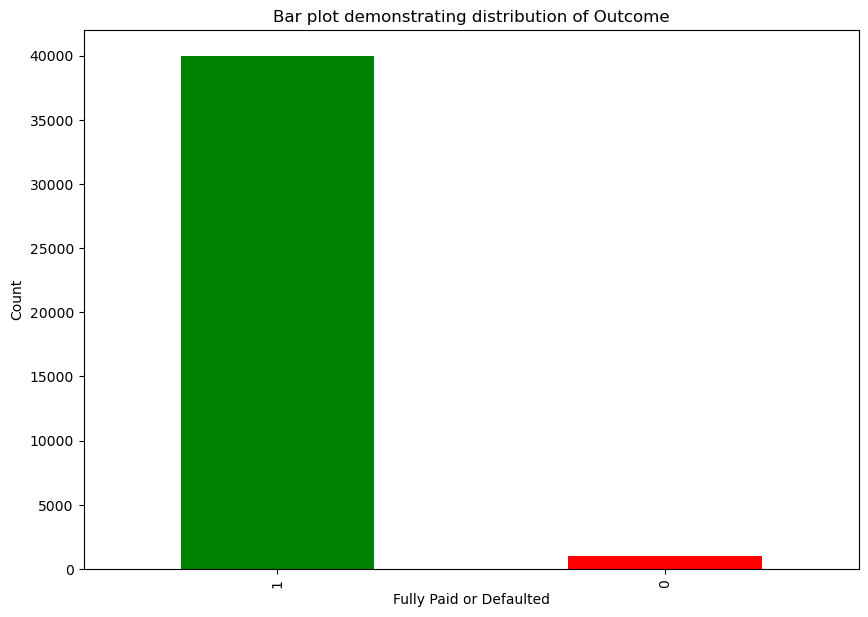

In [6]:
# Plot the distribution of outcome
plt.figure(figsize = (10,7))
df['outcome'].value_counts().plot(kind = "bar", color = ["green","red"])
plt.title("Bar plot demonstrating distribution of Outcome")
plt.xlabel("Fully Paid or Defaulted")
plt.ylabel("Count")
plt.show()

I would like to create a new feature detailing the loan amount to income ratio 

In [10]:
# Calculate loan_amnt to income ratio
df['loan_amnt_to_income'] = df['loan_amnt'] / df['annual_inc']

# Display the outcome and loan_amnt_to_income ratio
result = df[['outcome', 'loan_amnt_to_income']]
print(result)

       outcome  loan_amnt_to_income
0            1             0.319652
1            1             0.125000
2            1             0.269318
3            1             0.014815
4            1             0.298228
...        ...                  ...
40995        1             0.257143
40996        1             0.310184
40997        1             0.071000
40998        1             0.187500
40999        1             0.125556

[41000 rows x 2 columns]


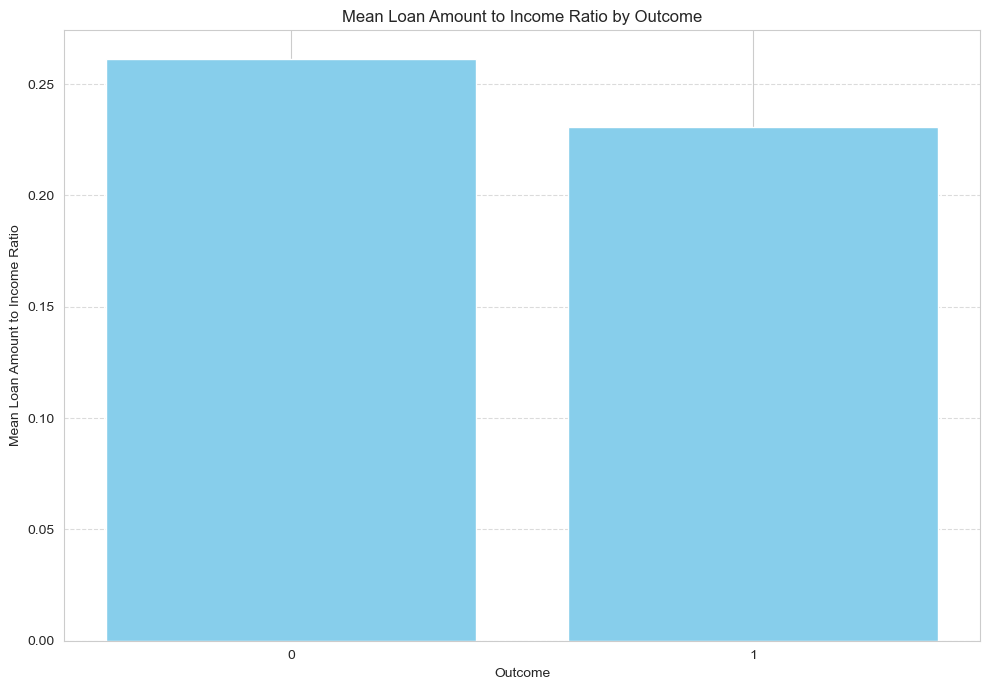

In [11]:
# Print a bar chart showing the mean loan amount to income ratio by outcome
df_filtered = df[df['outcome'].isin([0, 1])]

# Group data by outcome and calculate mean loan_amnt_to_income ratio for each outcome
outcome_grouped = df_filtered.groupby('outcome')['loan_amnt_to_income'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 7))
plt.bar(outcome_grouped['outcome'], outcome_grouped['loan_amnt_to_income'], color='skyblue')
plt.xlabel('Outcome')
plt.ylabel('Mean Loan Amount to Income Ratio')
plt.title('Mean Loan Amount to Income Ratio by Outcome')
plt.xticks(outcome_grouped['outcome'])  # Set only 0 and 1 on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It shows that the customers who default on their loan payment have a higher mean loan amount to income ratio

In [12]:
# Determine which loan term was the most popular
term_outcome = df.groupby('term')['outcome'].sum()

term_outcome

term
36 months    29622
60 months    10378
Name: outcome, dtype: int64

36 months is the most popular loan term 

In [13]:
# Determine which loan term has the highest percentage of default payments
outcome_by_term = df.groupby('term')['outcome'].value_counts()

outcome_by_term

term       outcome
36 months  1          29622
           0            599
60 months  1          10378
           0            401
Name: count, dtype: int64

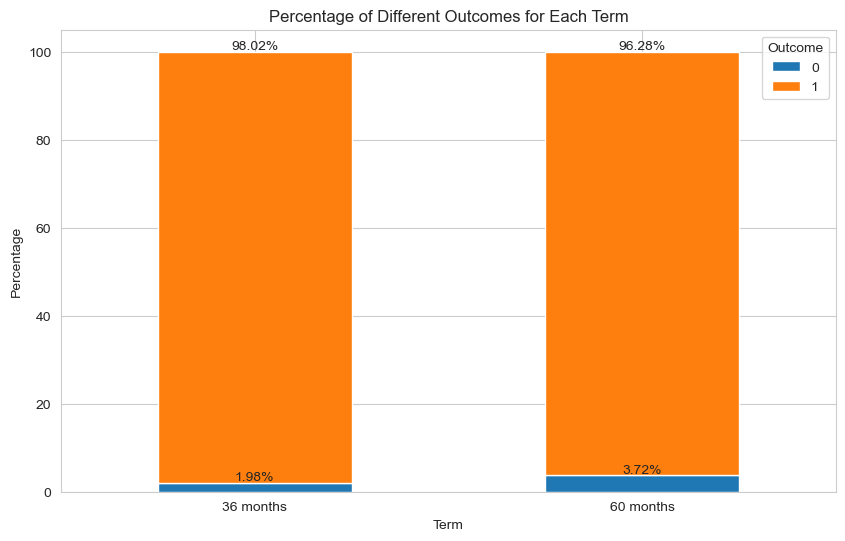

In [14]:
# Calculate percentages of different outcomes for each term
outcome_percentages = df.groupby('term')['outcome'].value_counts(normalize=True) * 100

# Unstack the outcome percentages to create a DataFrame
outcome_percentages_unstacked = outcome_percentages.unstack()

# Plot the percentages
ax = outcome_percentages_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Different Outcomes for Each Term')
plt.xlabel('Term')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outcome')

# Annotate percentages on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

The term with the highest percent of defaults is 60 months with 3.72% of loans using this term defaulting on their payments.  Next I will view the loan amounts by home ownership

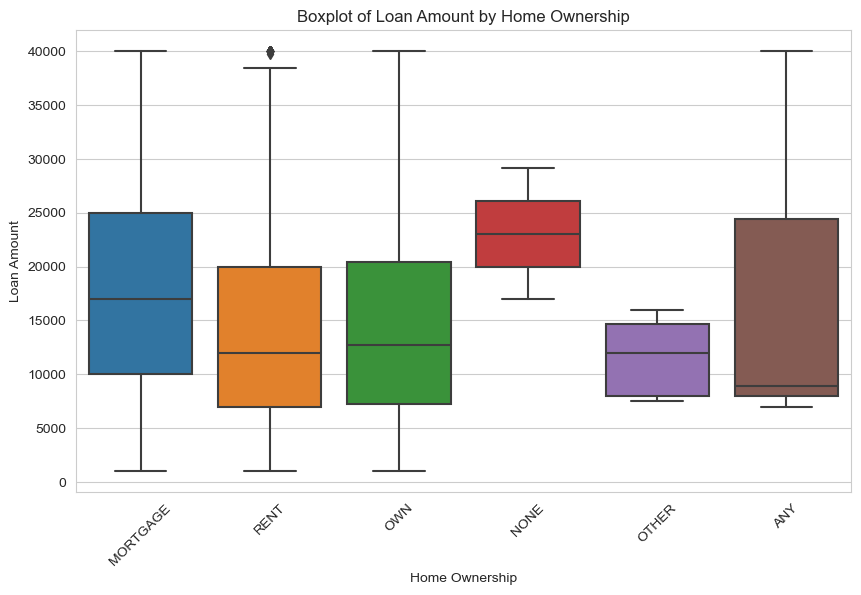

In [15]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', data=df)
plt.title('Boxplot of Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The boxplot shows that applicants who consider themselves to have "none" in home ownership have the highest median loan amount whilst "any" has the largest range.  Applicants who "rent" on average have the lowest loan amount.

I would like to explore the total number of successful loan applications in relation to the years the applicant has been in employment

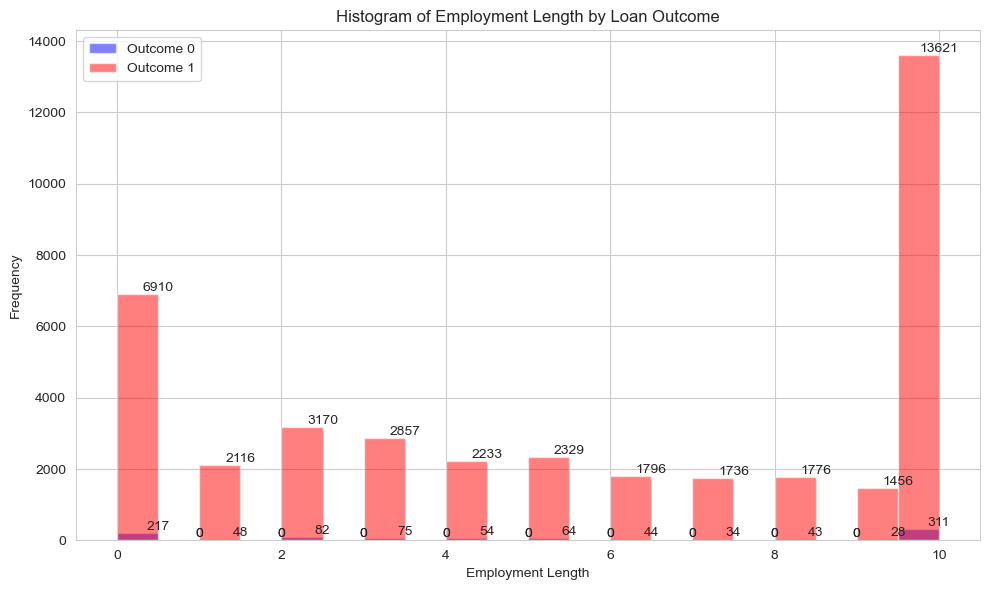

In [16]:
# Filter dataframe to include only outcome values of 0 and 1
df_hist = df[df['outcome'].isin([0, 1])]

# Define colors for outcomes
colors = {0: 'blue', 1: 'red'}

# Plot histograms
plt.figure(figsize=(10, 6))
for outcome, color in colors.items():
    df_outcome = df_hist[df_hist['outcome'] == outcome]
    counts, bins, _ = plt.hist(df_outcome['emp_length'], bins=20, color=color, alpha=0.5, label=f'Outcome {outcome}')
    # Add frequency amount above each bar
    for count, bin_edge in zip(counts, bins):
        plt.text(bin_edge + 0.5, count, str(int(count)), ha='center', va='bottom')

plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.title('Histogram of Employment Length by Loan Outcome')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The above histogram shows that applicants in employment for 10 or more years are the most frequent to pay off their loans with 13621 successfully paying back.applying for loans whereas applicants who have been in employment for one year or less are the second most frequent repaying their loans.

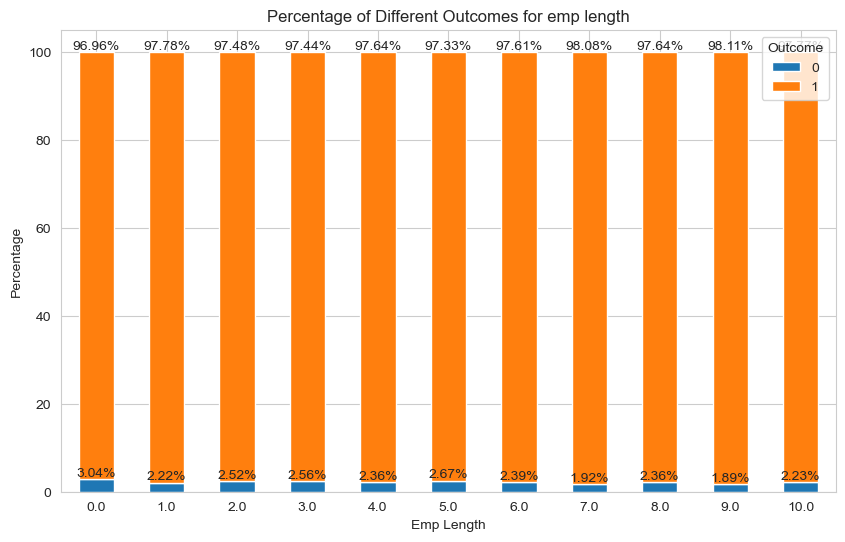

In [17]:
# Calculate percentages of different outcomes for each emp_length
outcome_percentages_emp = df.groupby('emp_length')['outcome'].value_counts(normalize=True) * 100

# Unstack the outcome percentages to create a DataFrame
outcome_percentages_emp_unstacked = outcome_percentages_emp.unstack()

# Plot the percentages
ax = outcome_percentages_emp_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Different Outcomes for emp length')
plt.xlabel('Emp Length')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outcome')

# Annotate percentages on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

The above bar chart shows that applicants who have taken a loan out and have only been in employment for less than a year are the most likely to default on their payment at 3.04%

<a id='num'></a>
## Univariate and bivariate analysis

Univariate Analysis: Analyse individual features.  As there are so many different variables to explore and I am conscious of time I will explore the distribution of the target variable.

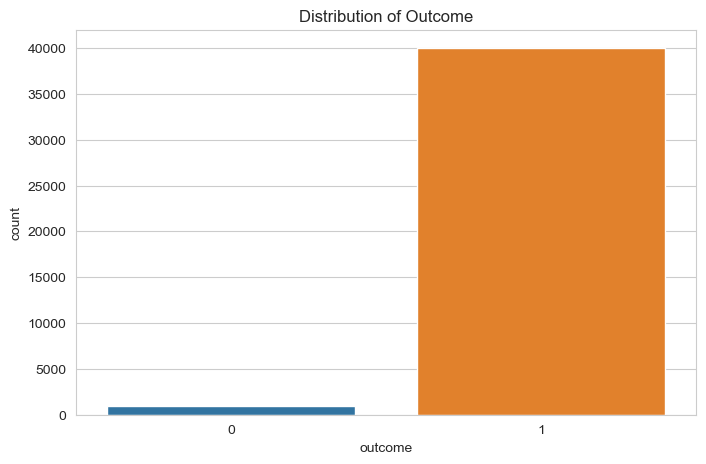

In [18]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()


Conscious of the time for a 4 hour exercise the distribution of all numerical features are ran for quick analysis and to gather some trends.

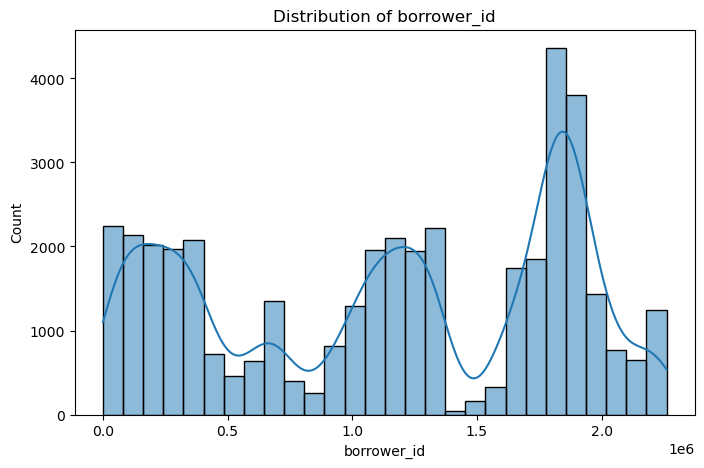

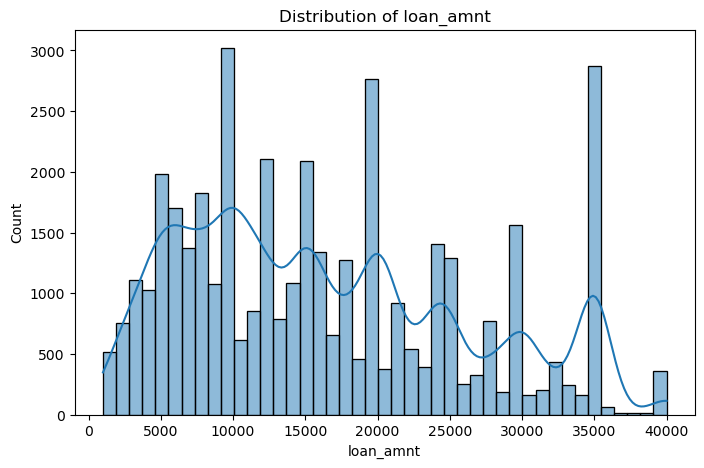

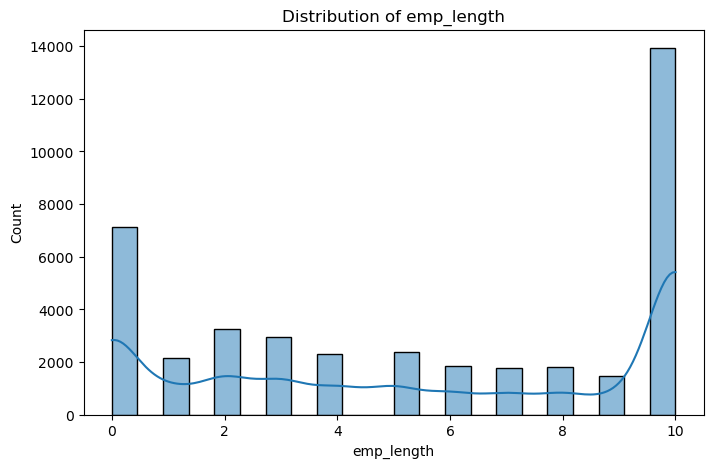

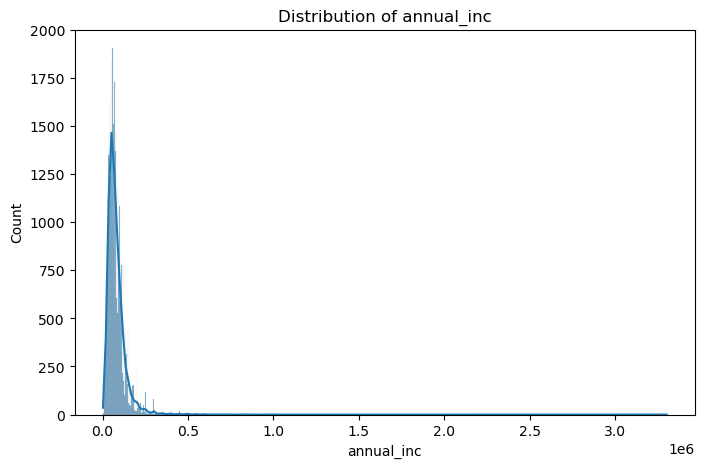

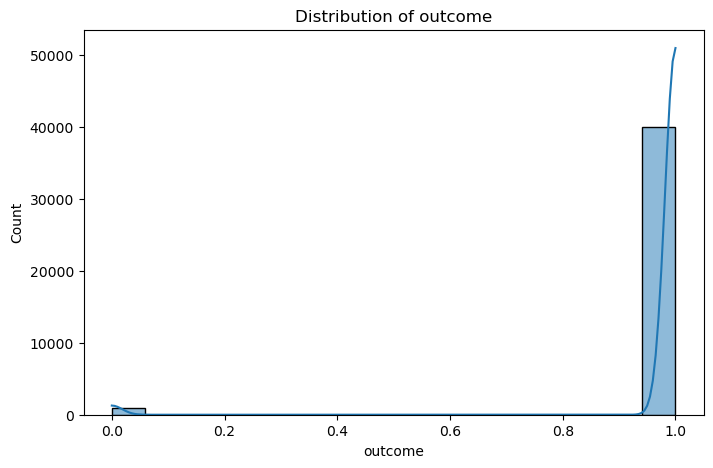

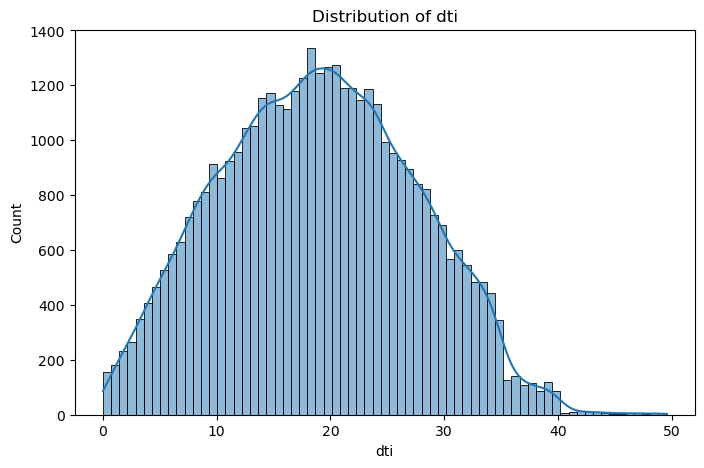

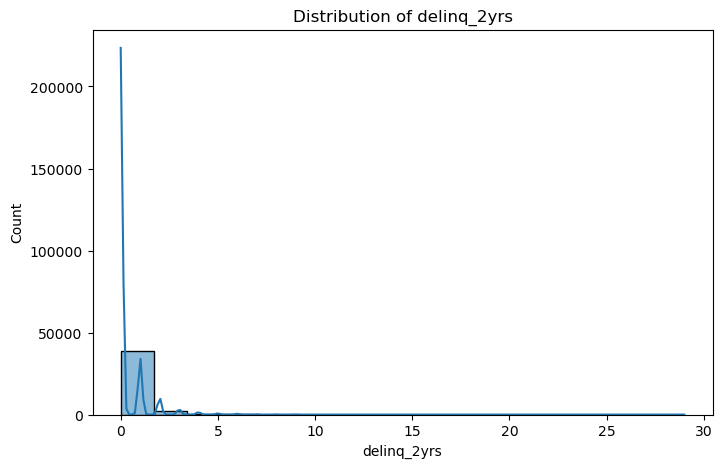

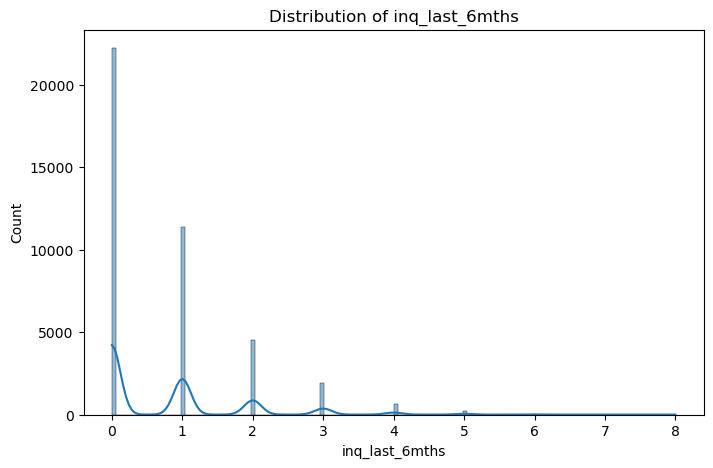

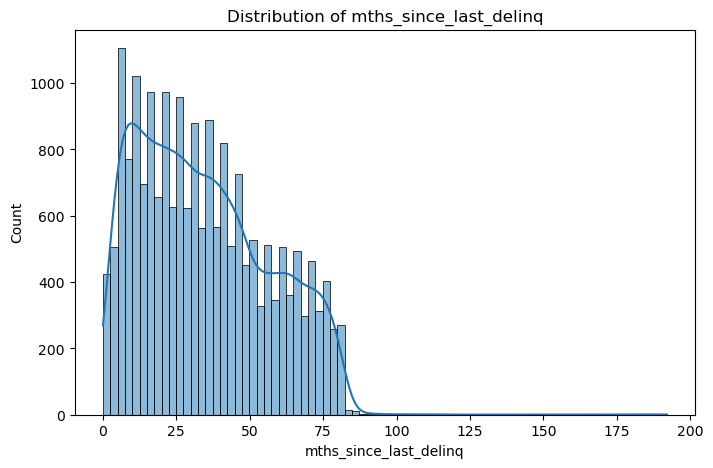

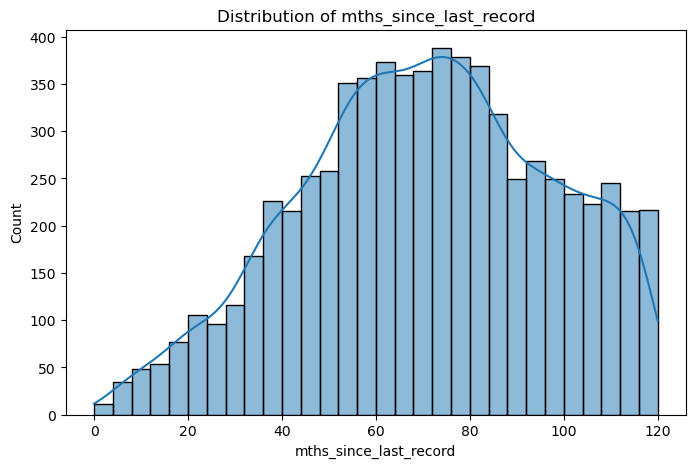

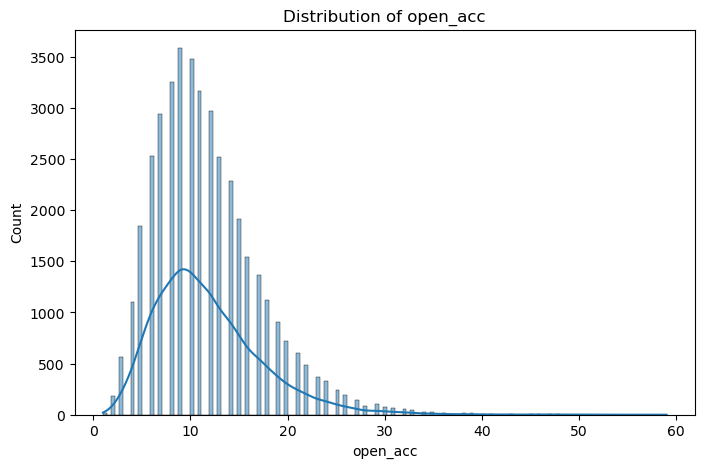

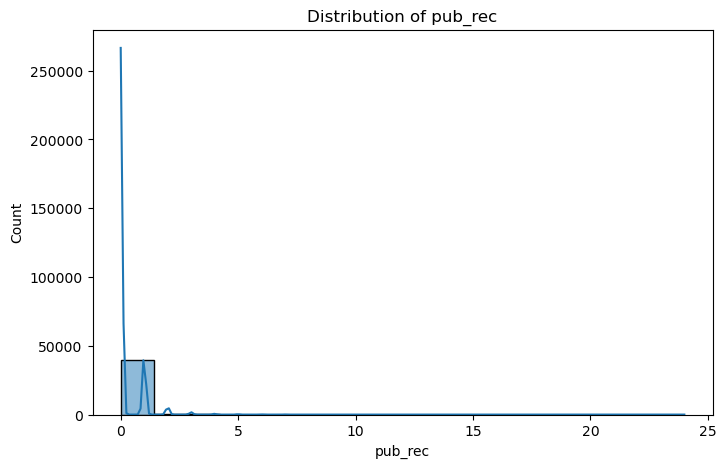

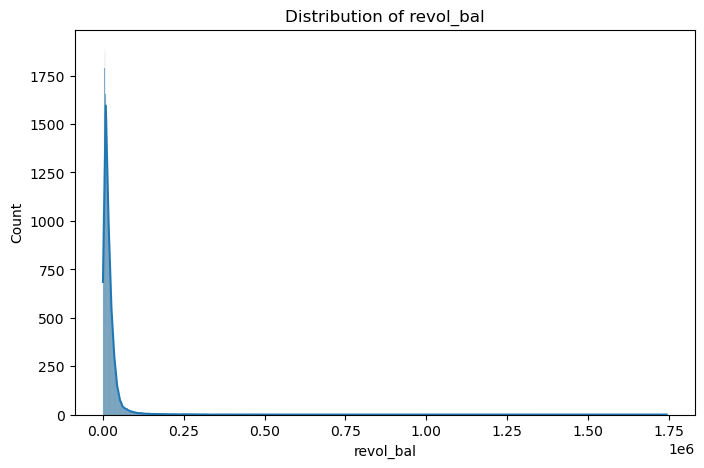

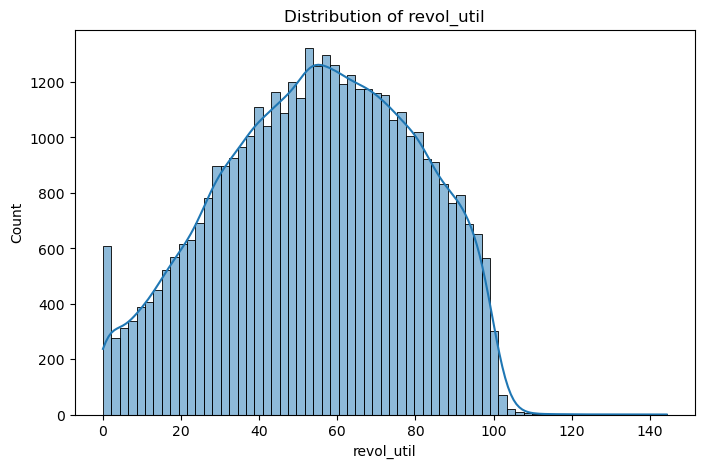

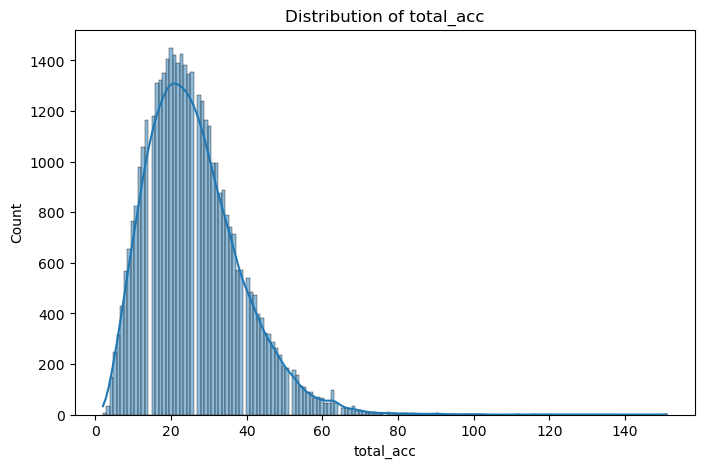

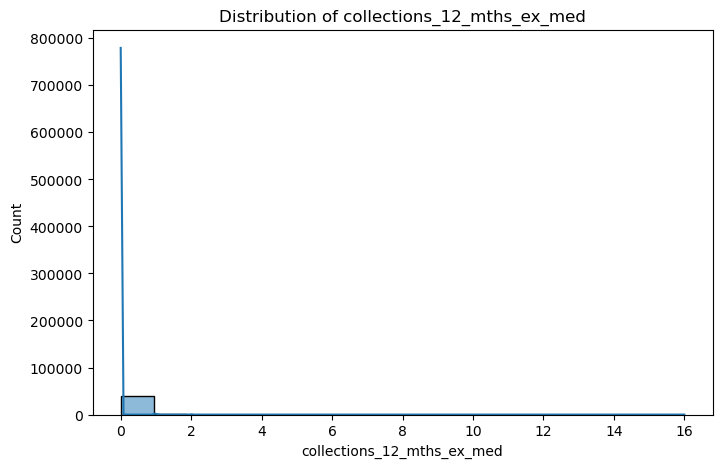

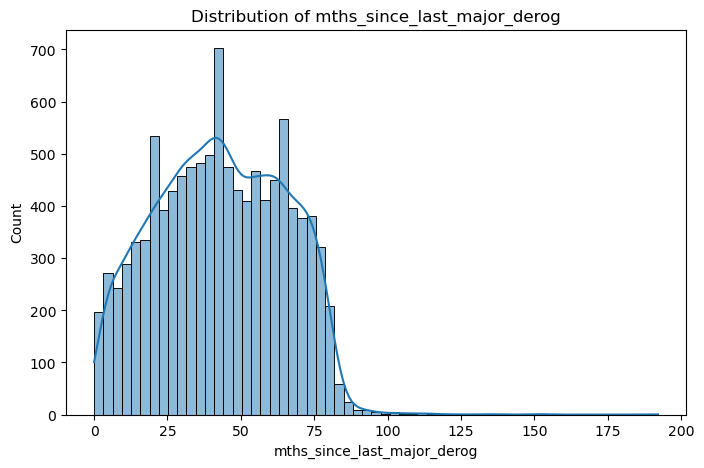

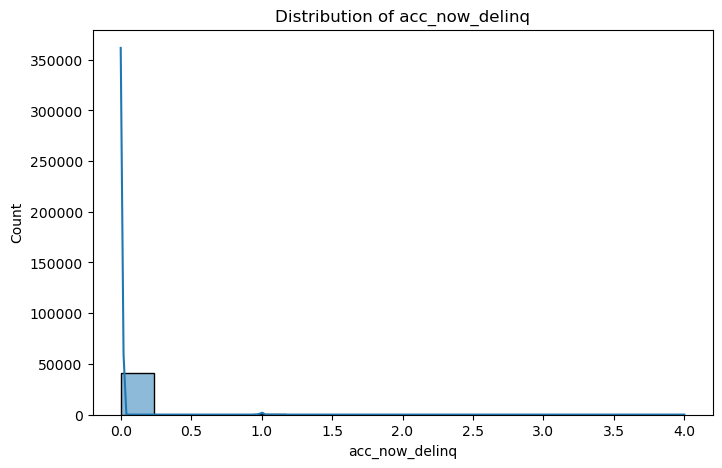

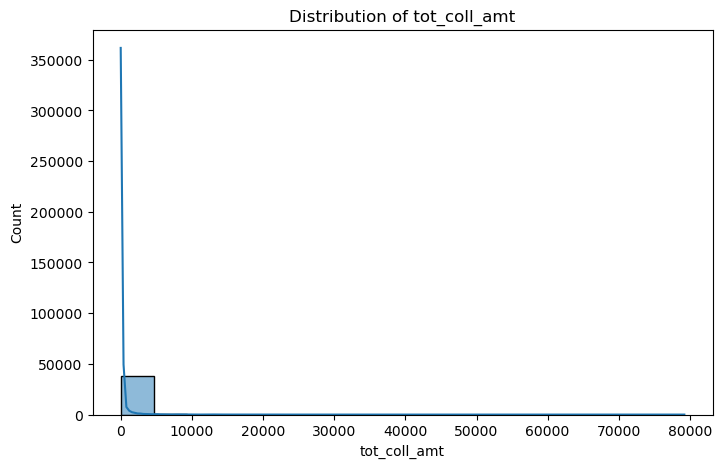

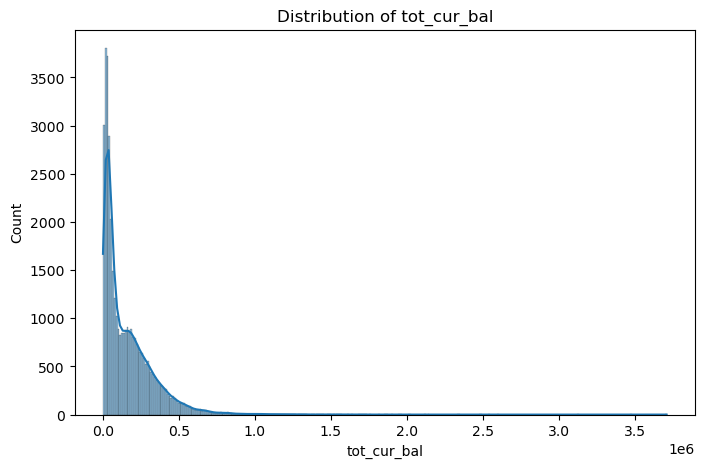

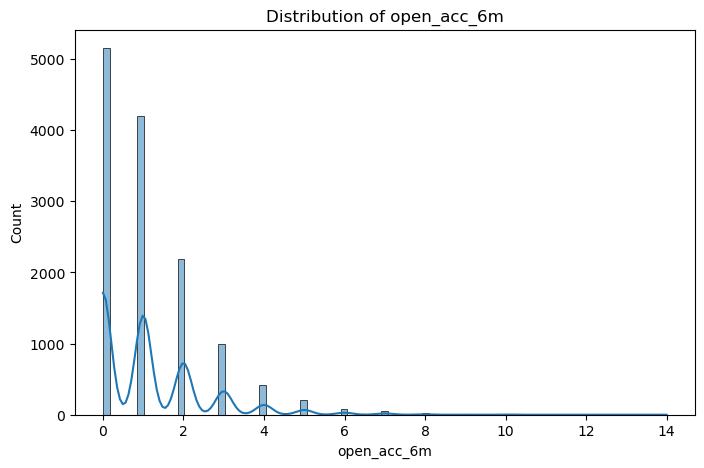

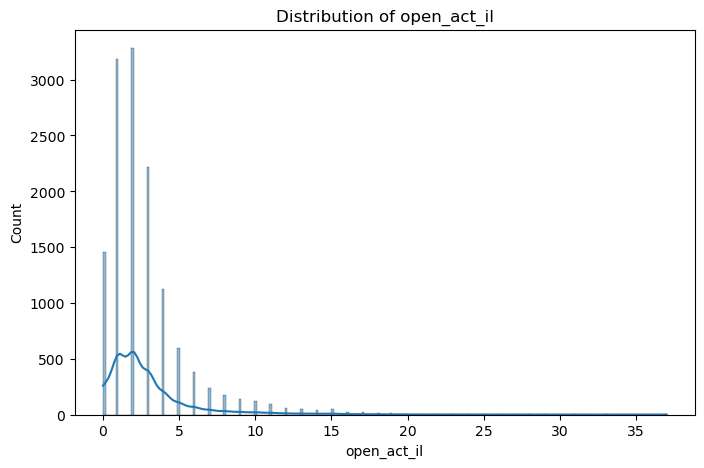

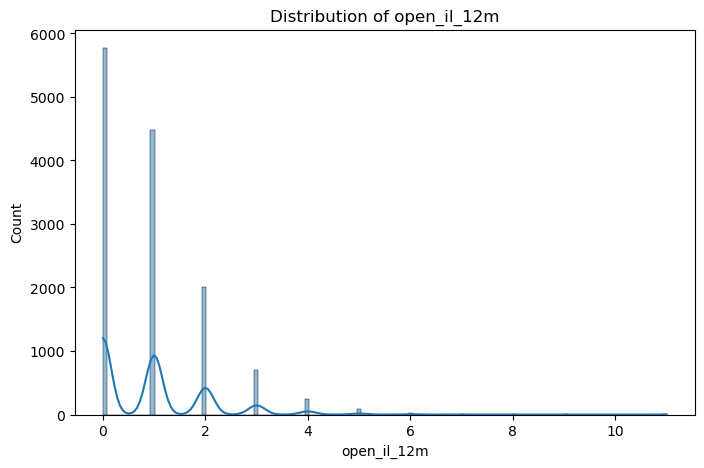

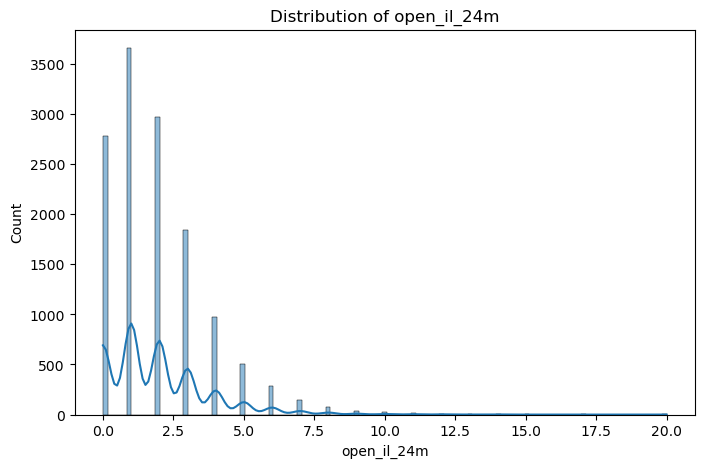

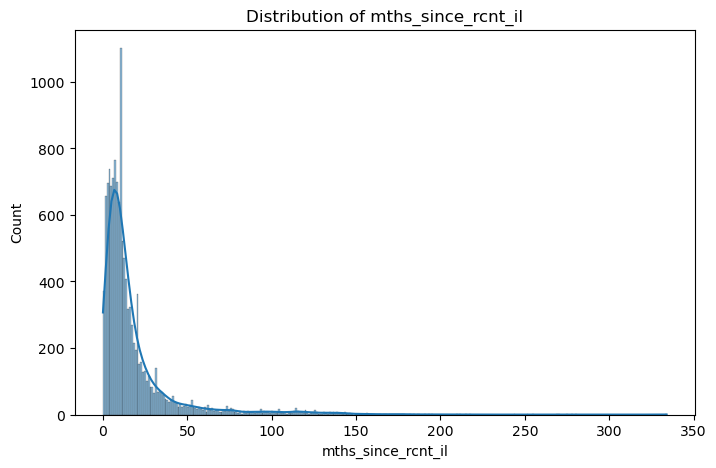

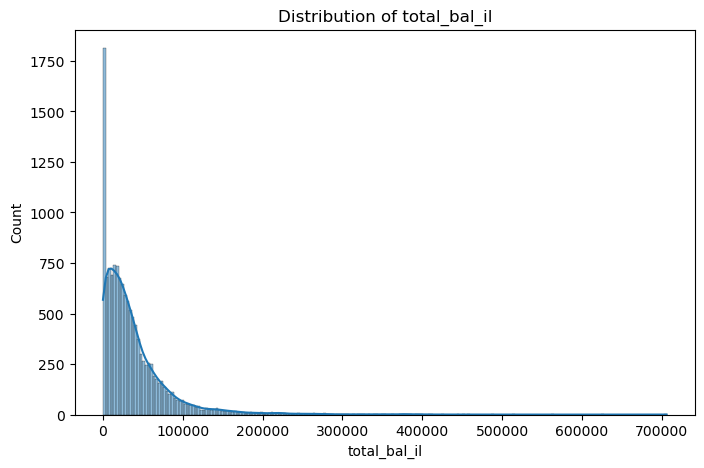

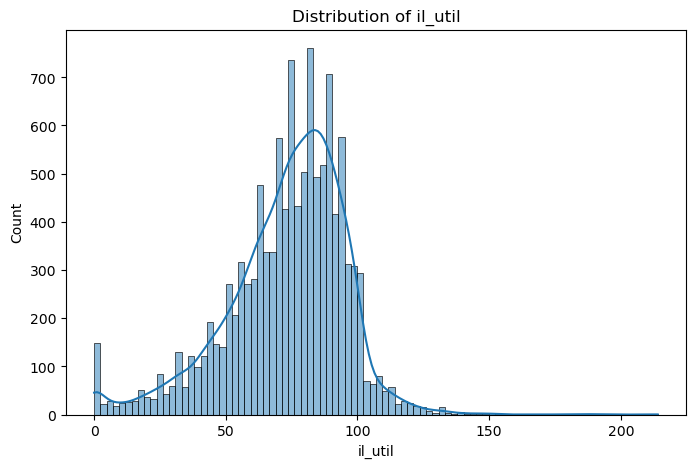

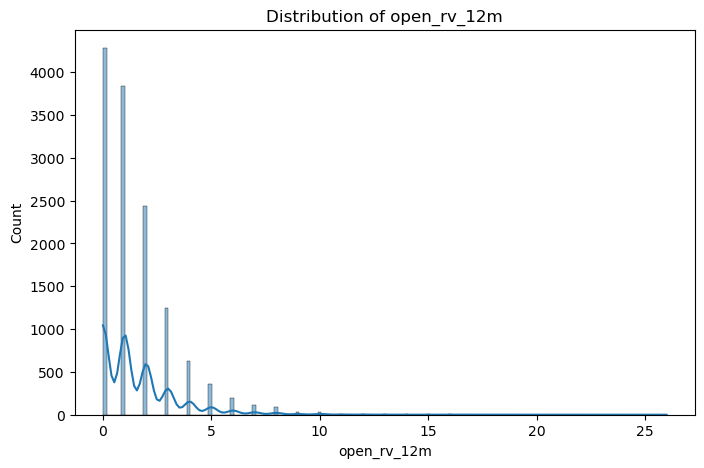

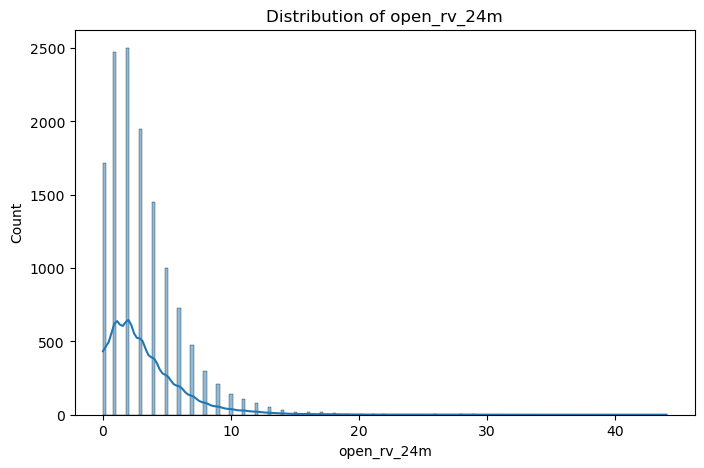

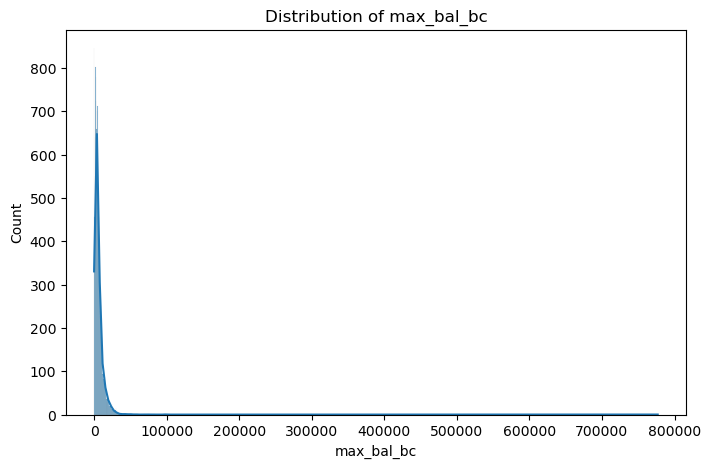

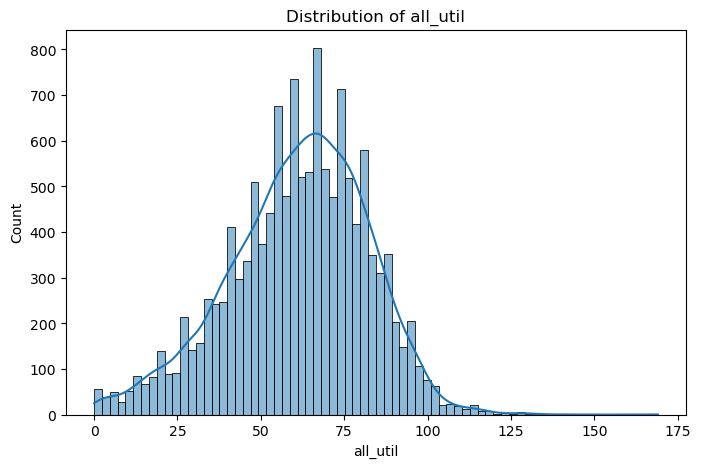

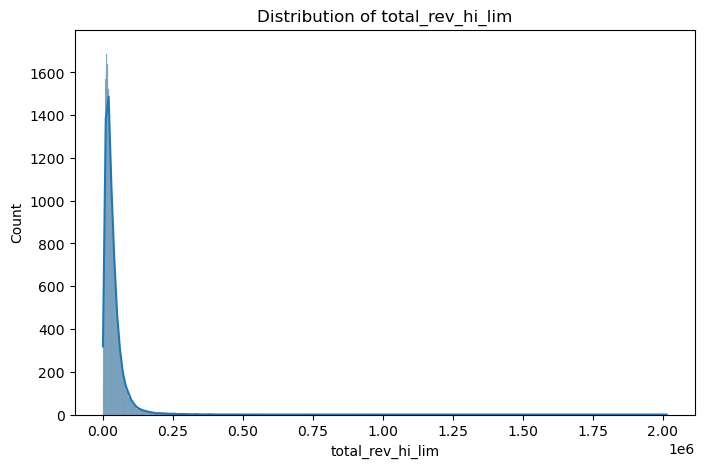

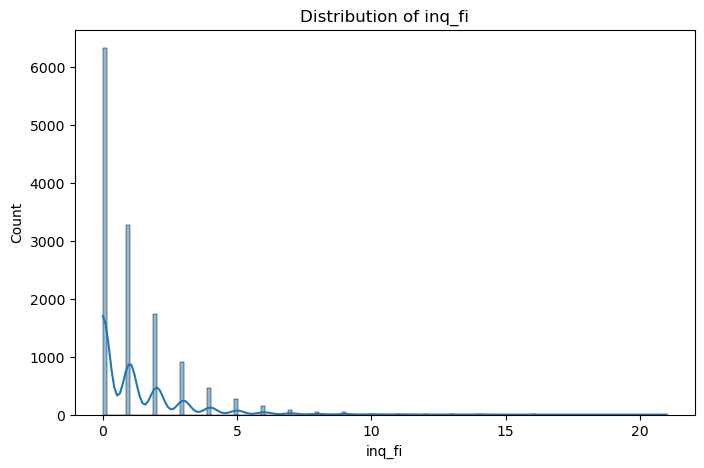

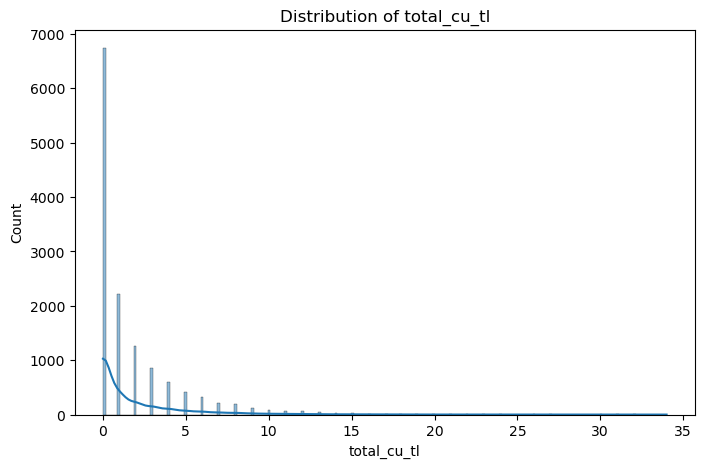

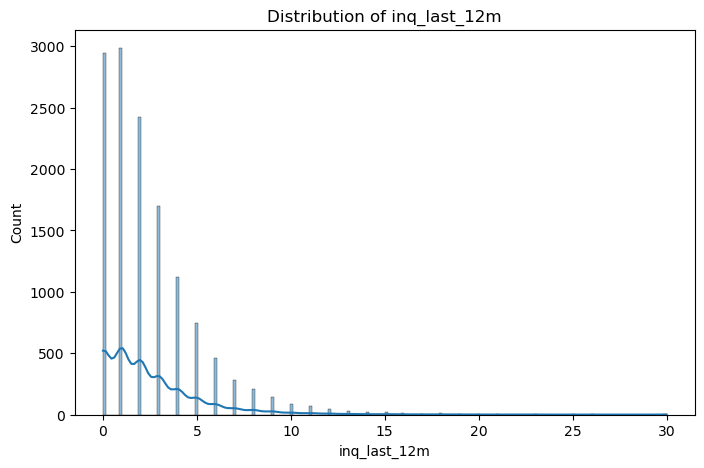

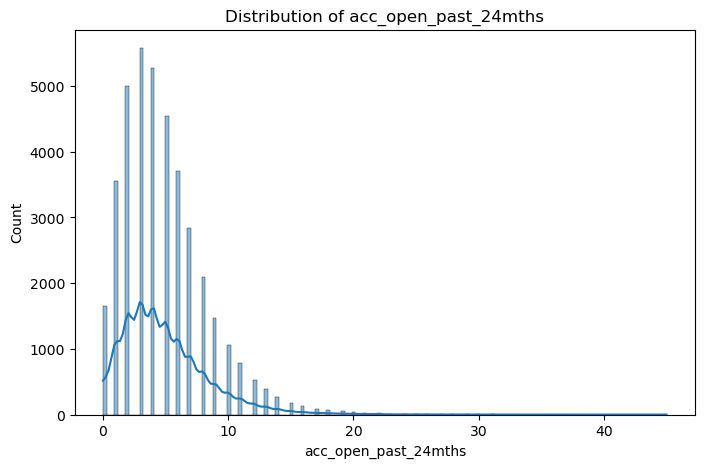

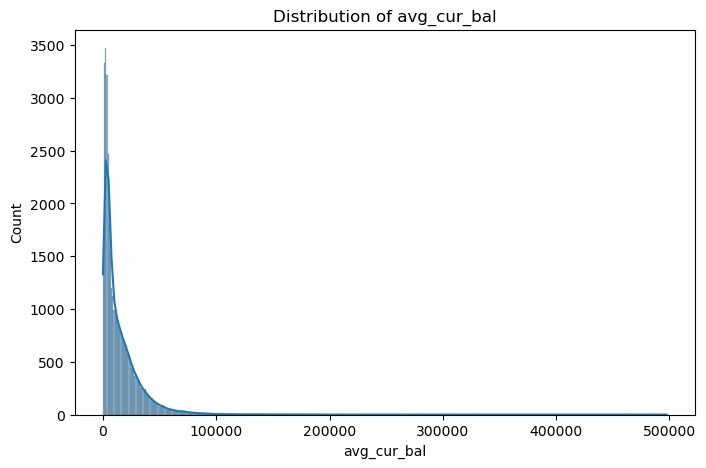

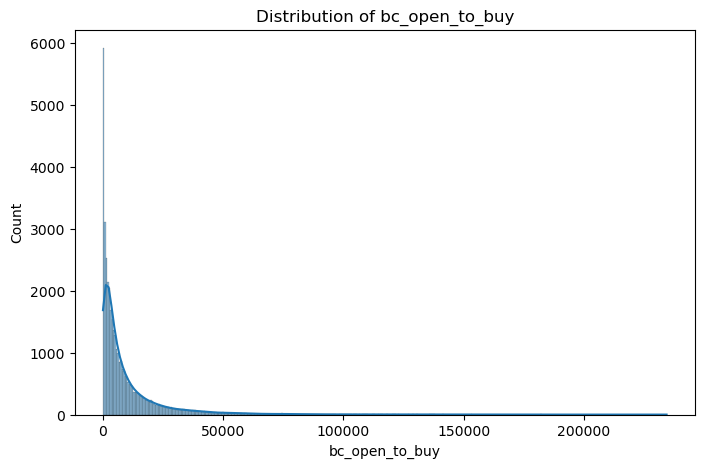

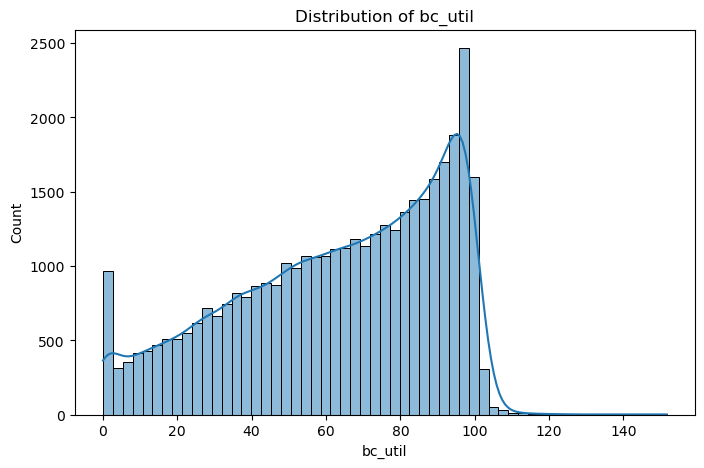

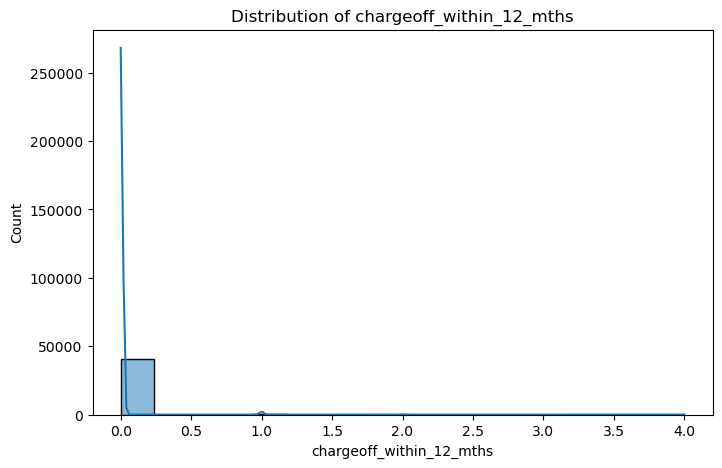

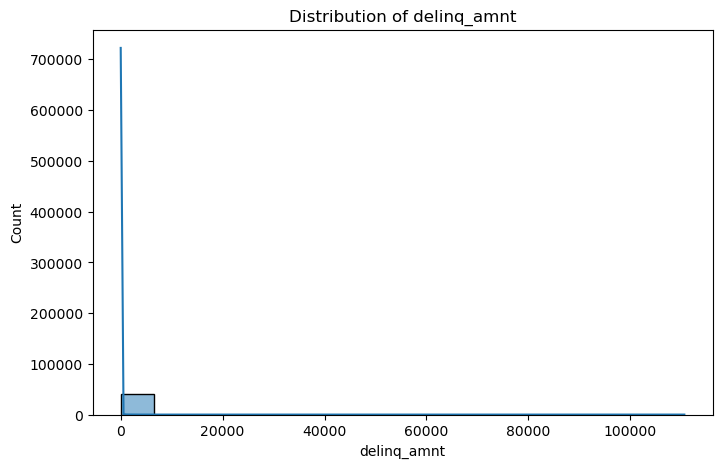

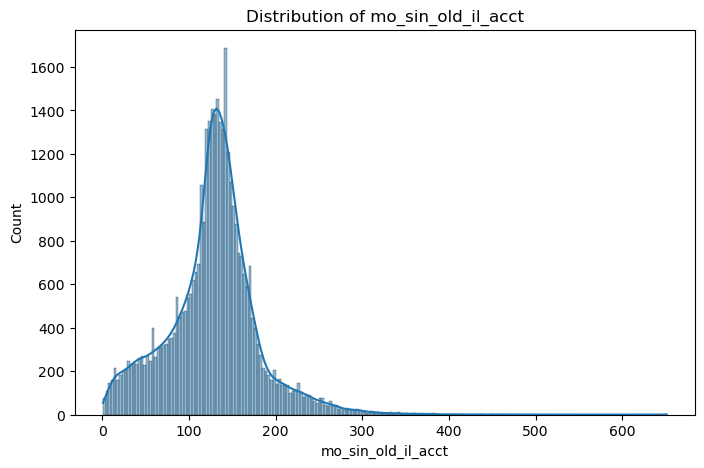

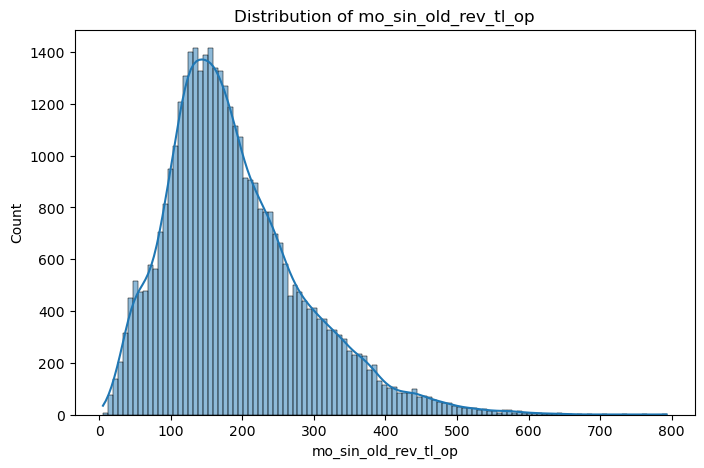

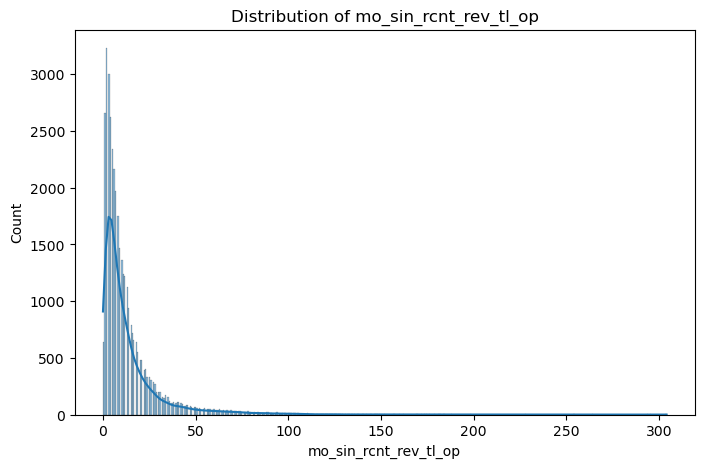

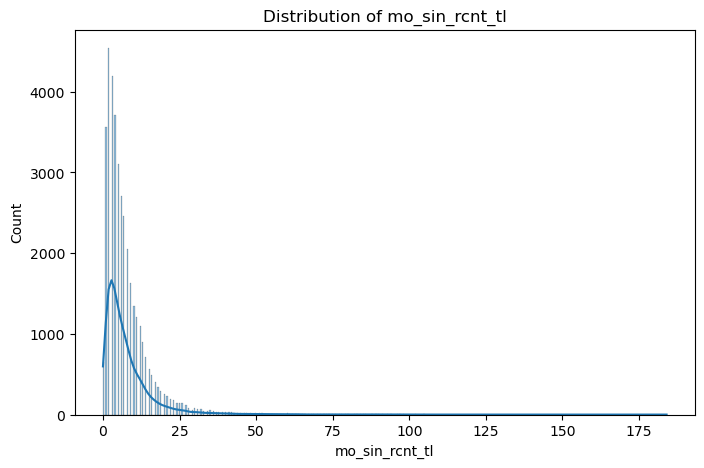

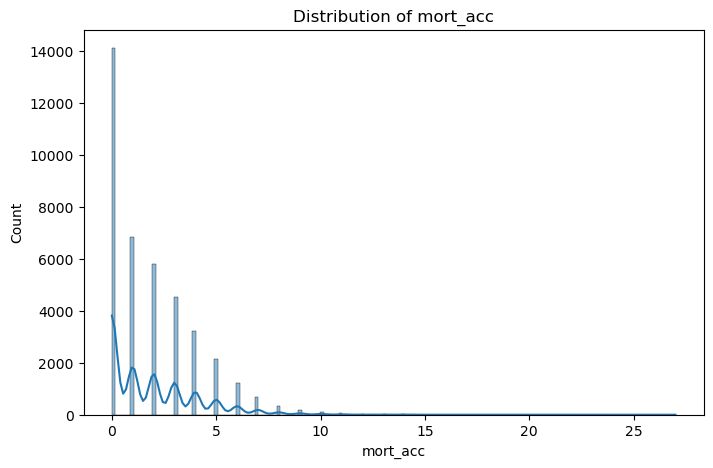

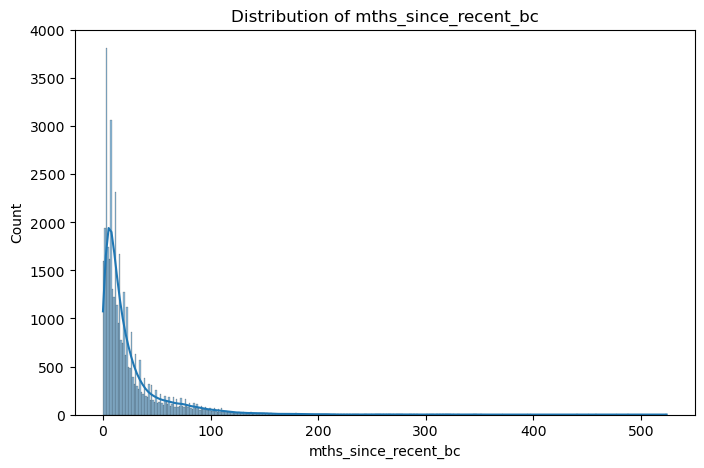

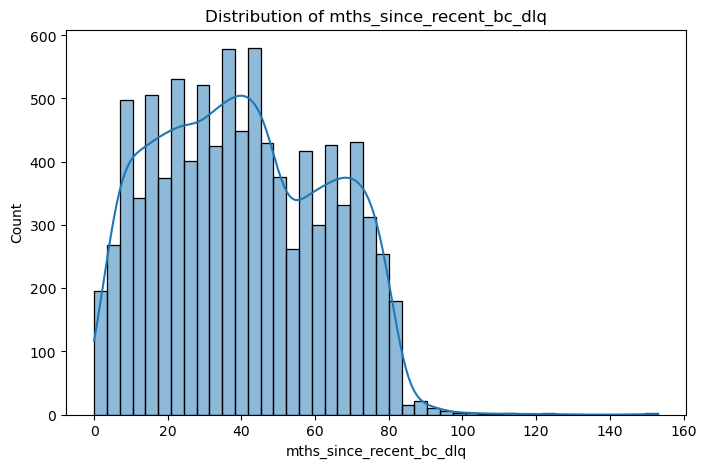

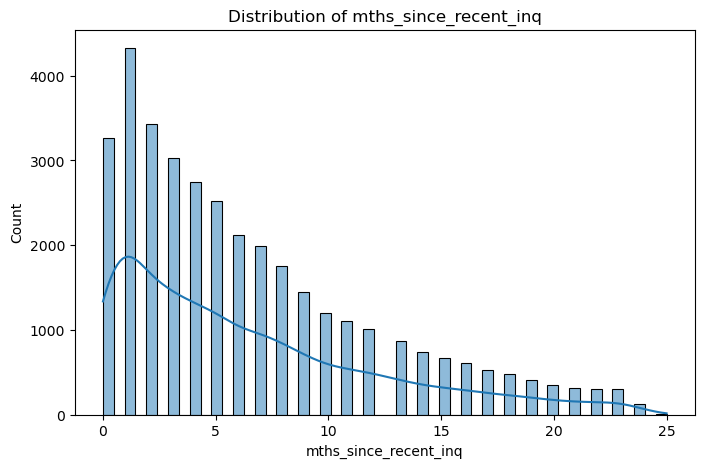

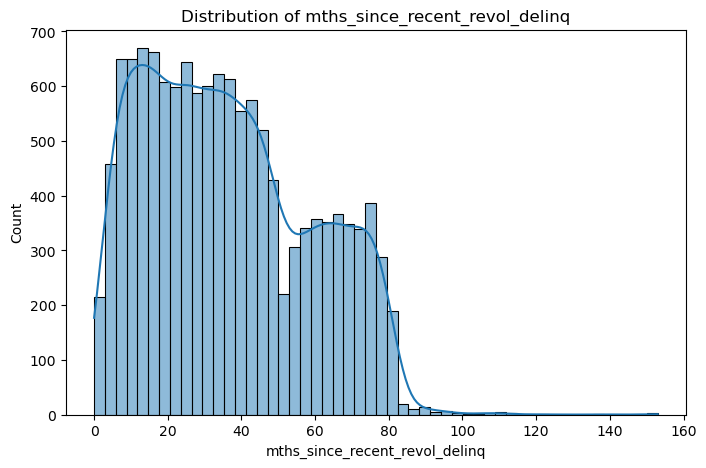

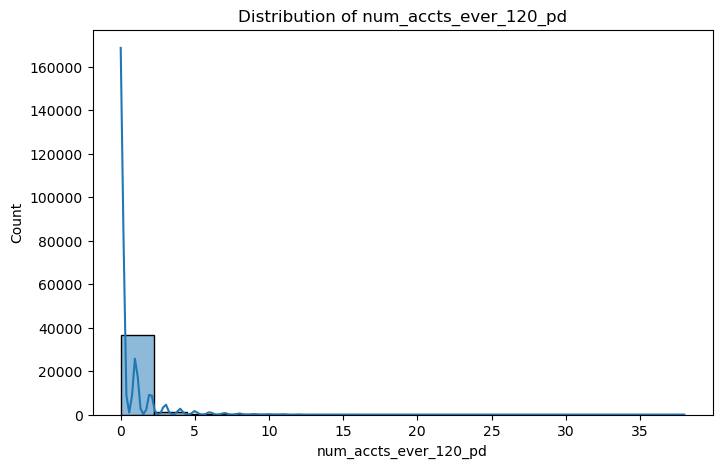

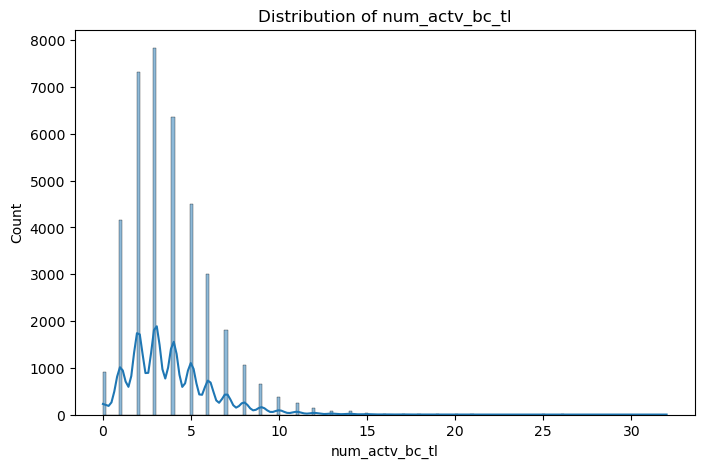

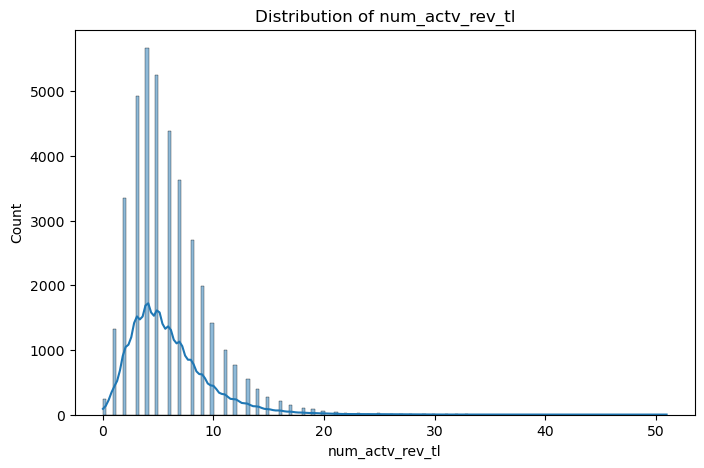

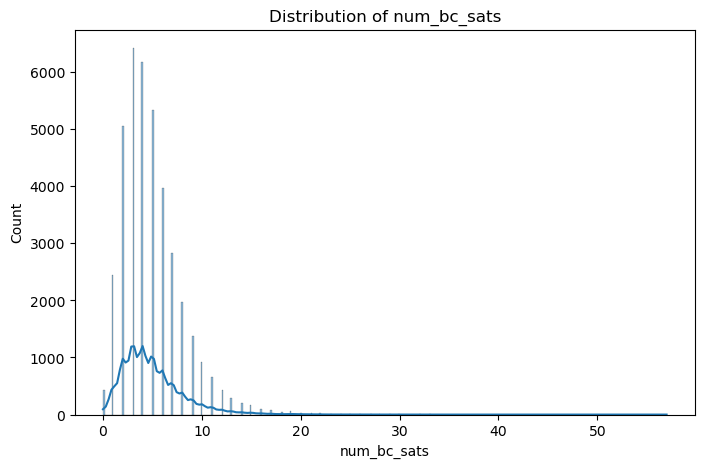

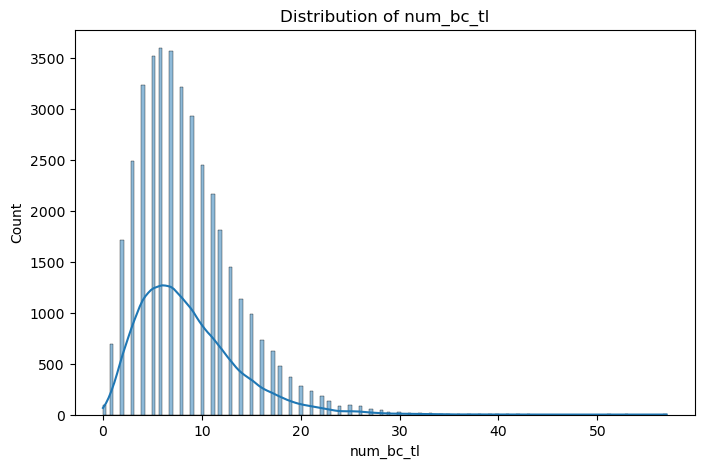

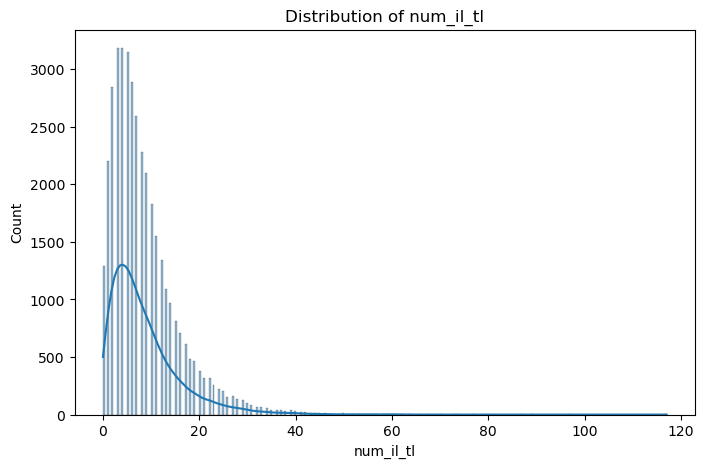

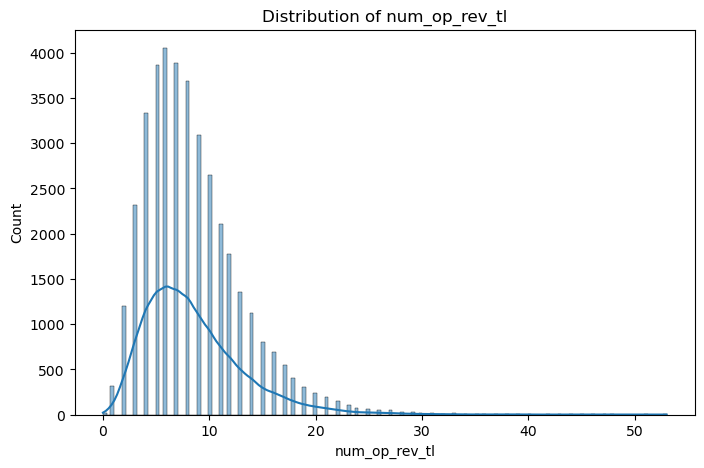

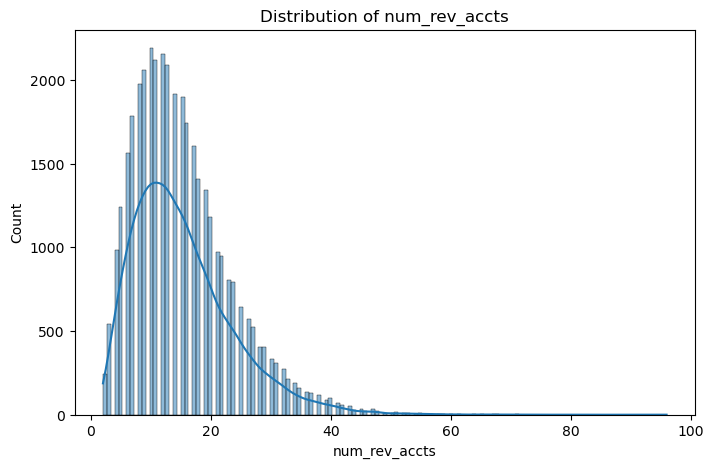

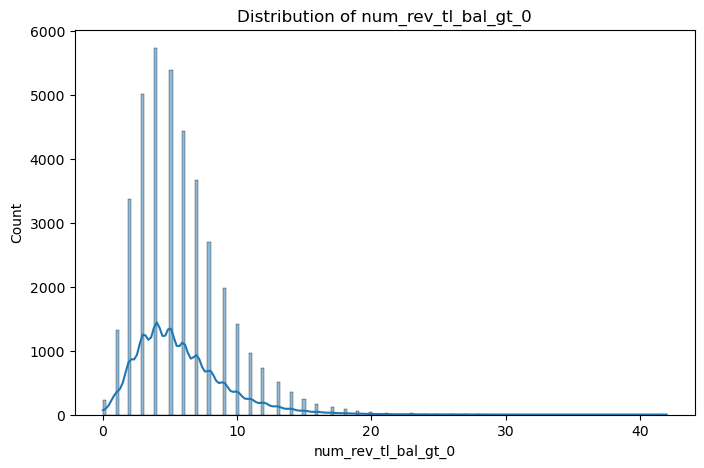

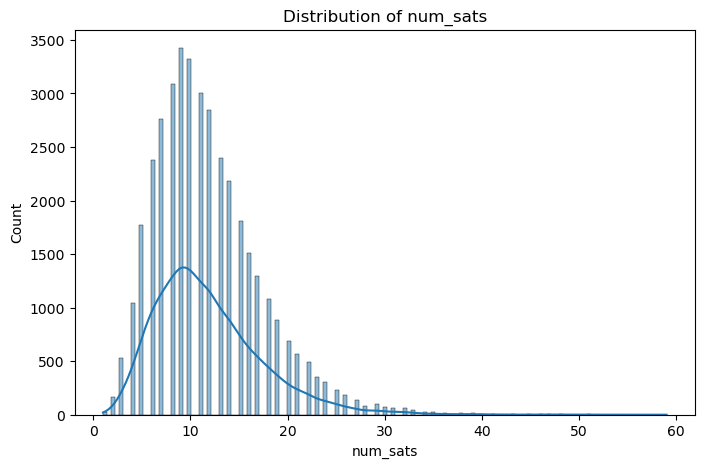

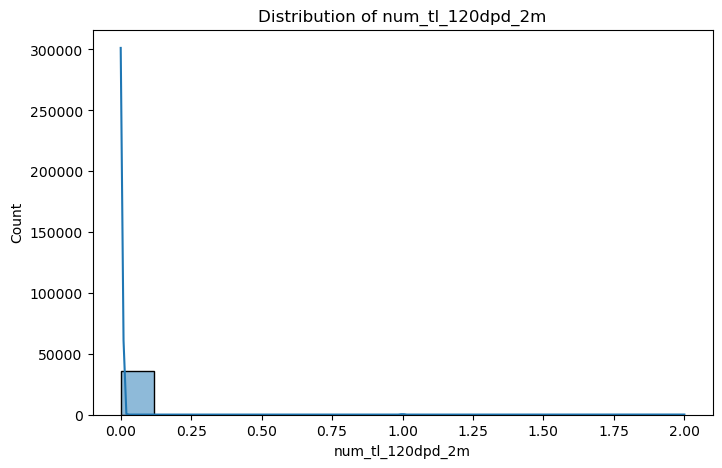

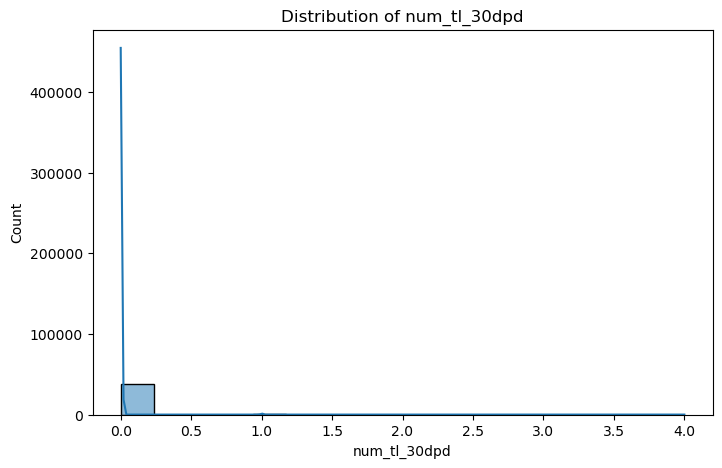

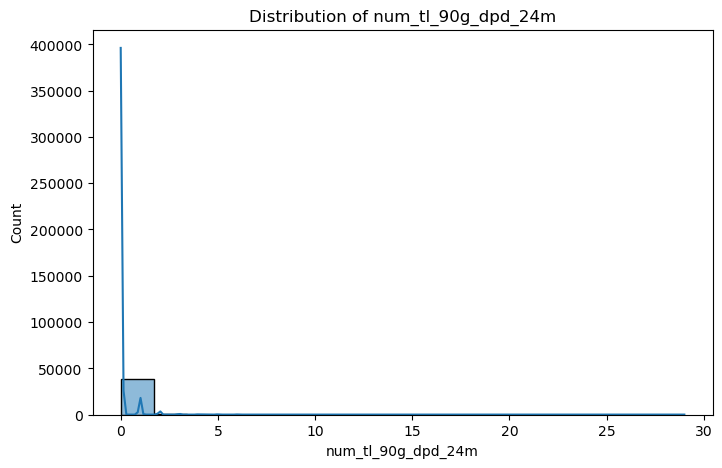

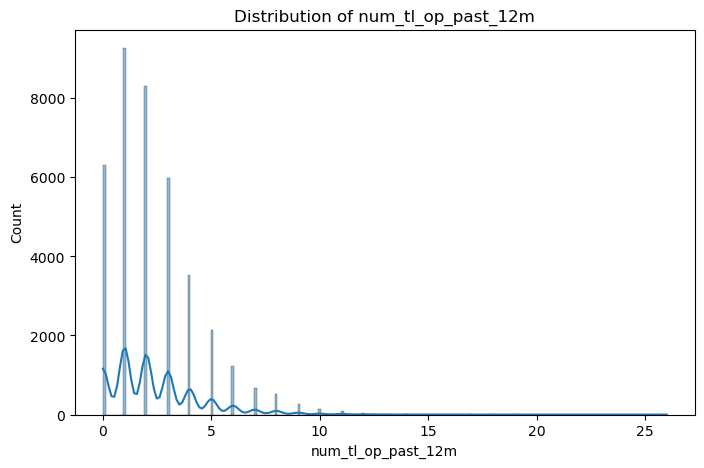

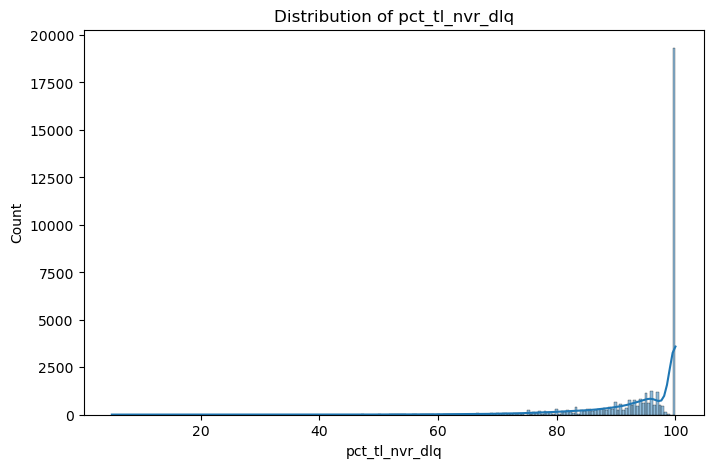

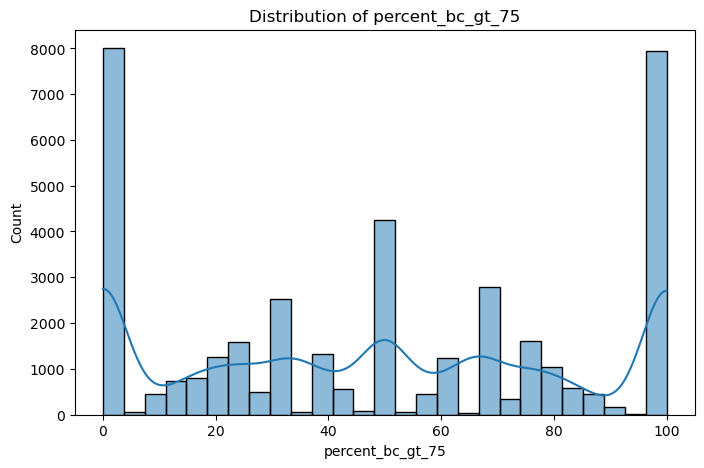

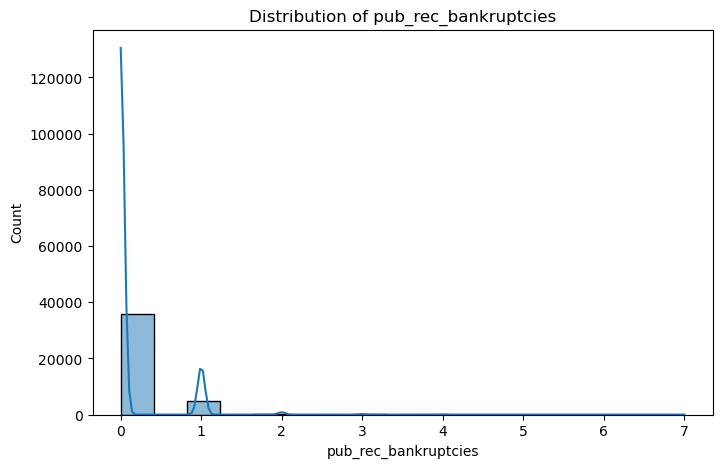

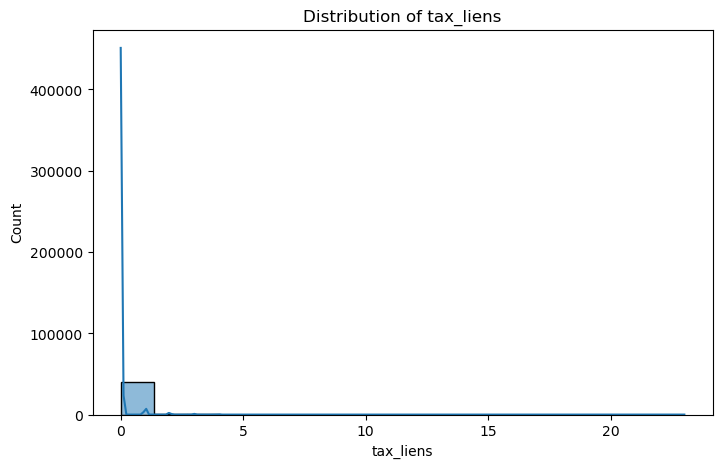

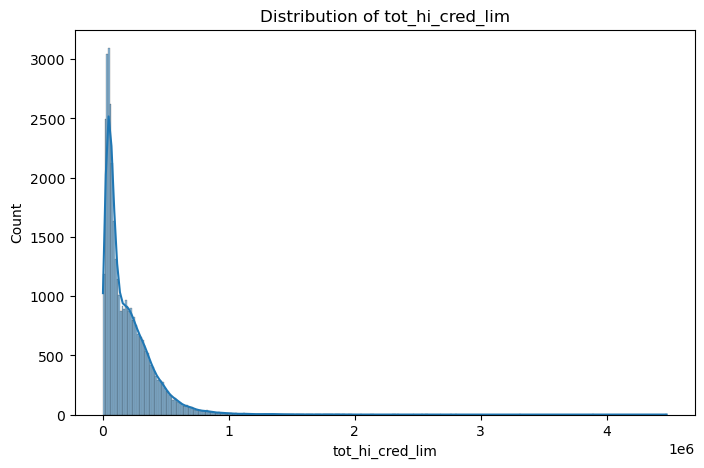

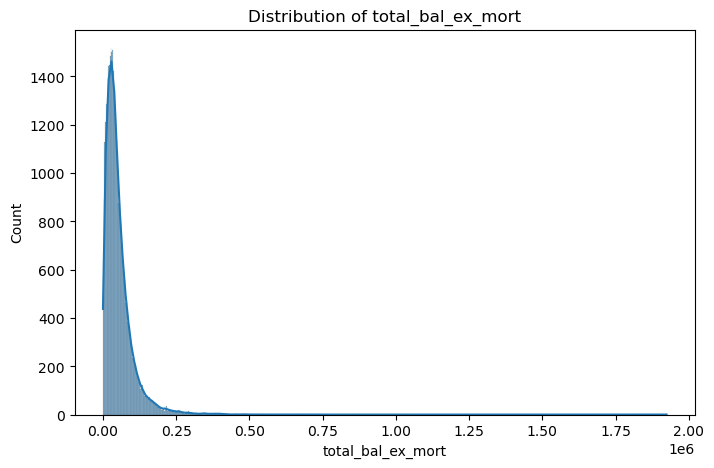

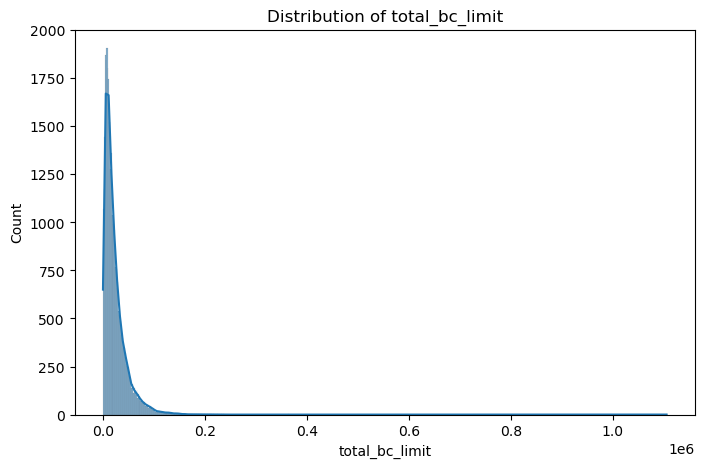

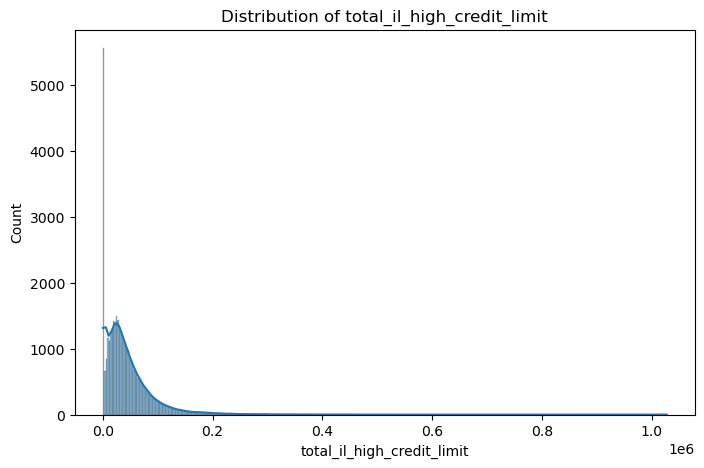

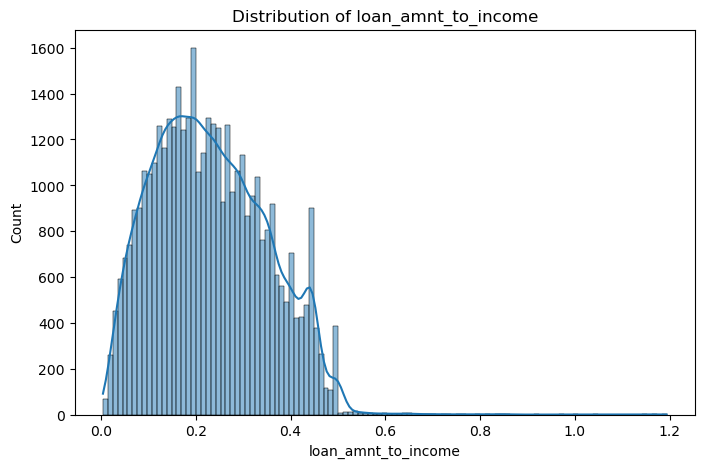

In [55]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Bivariate Analysis: Explore relationships between features and the target variable.

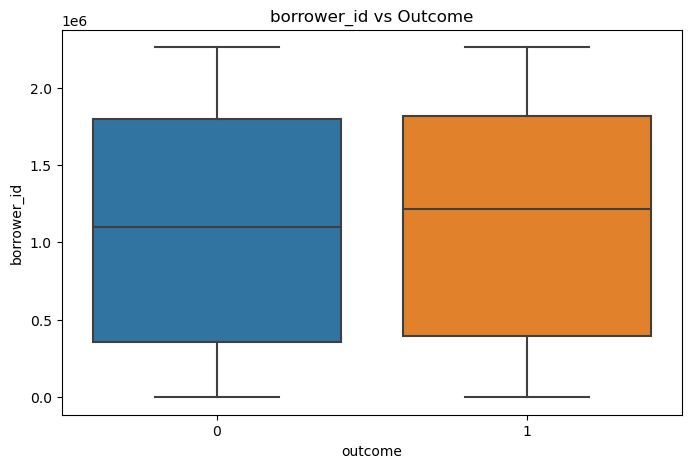

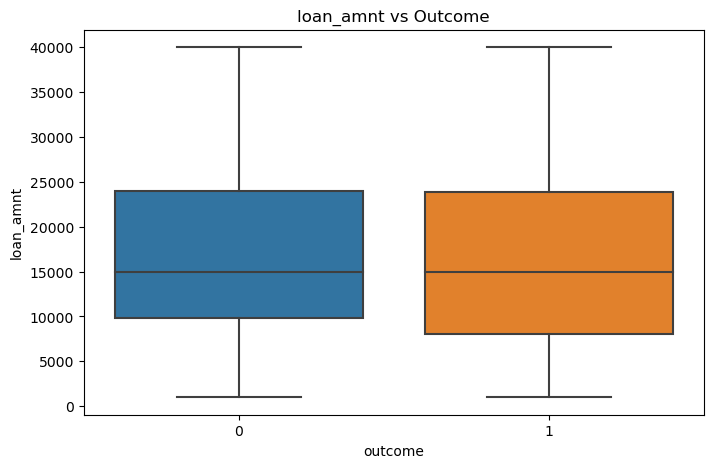

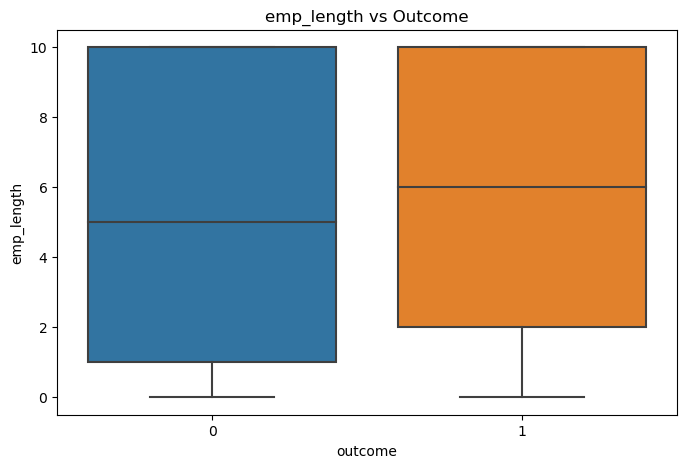

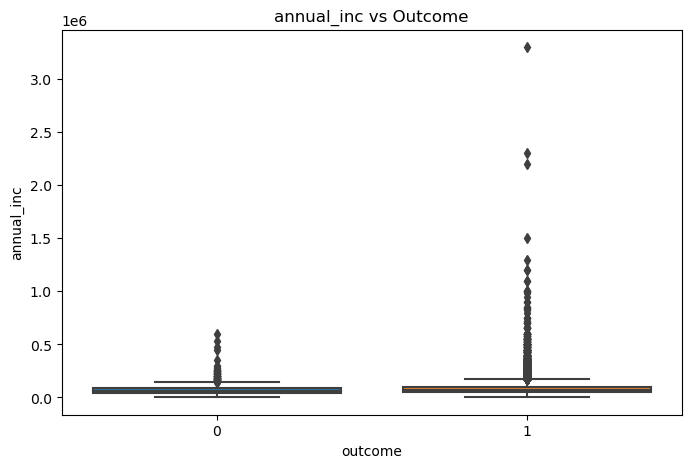

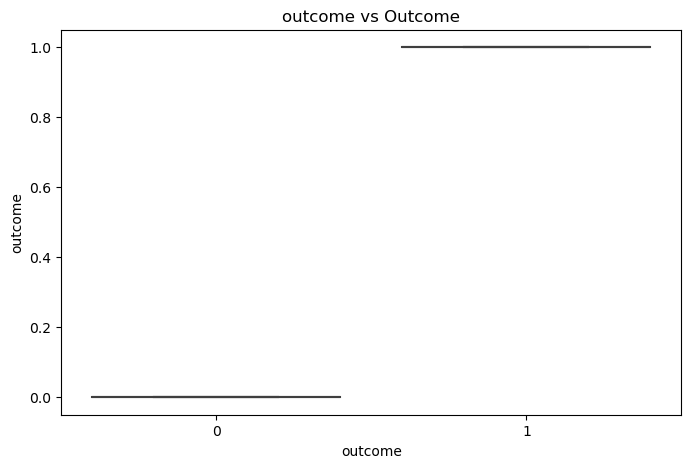

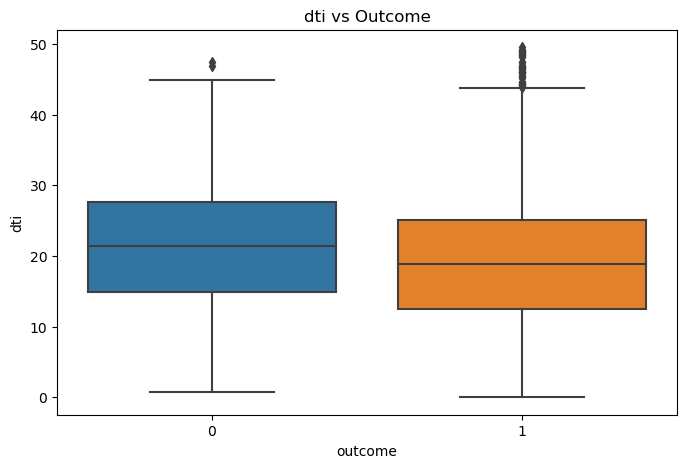

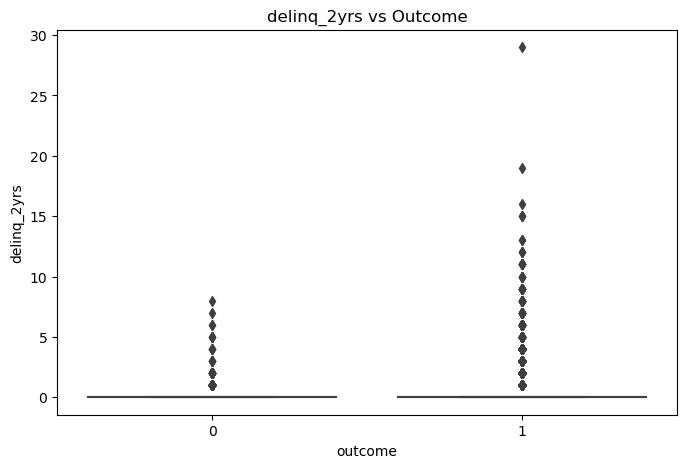

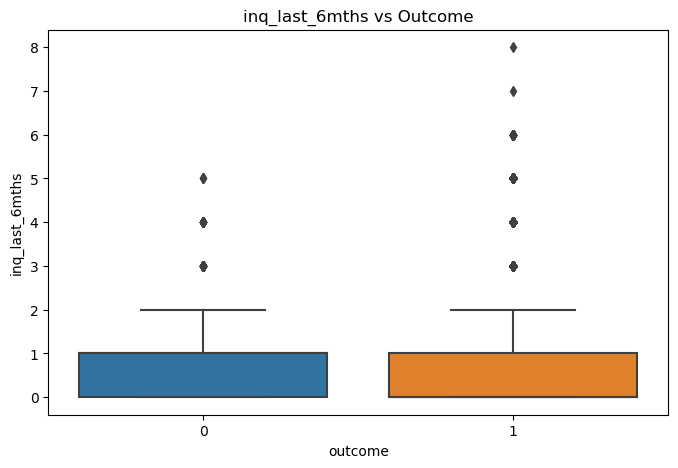

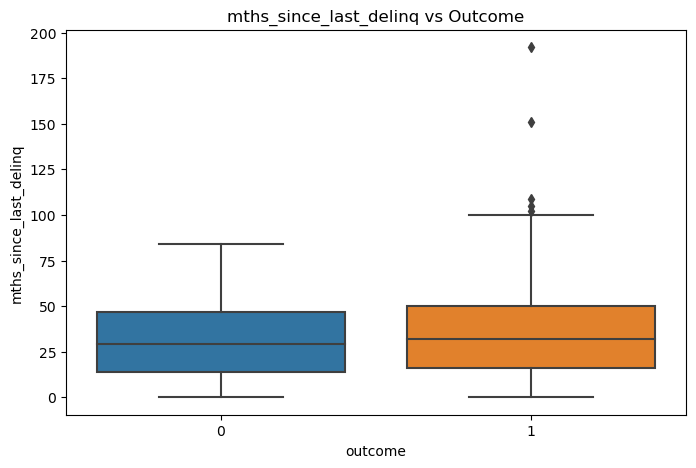

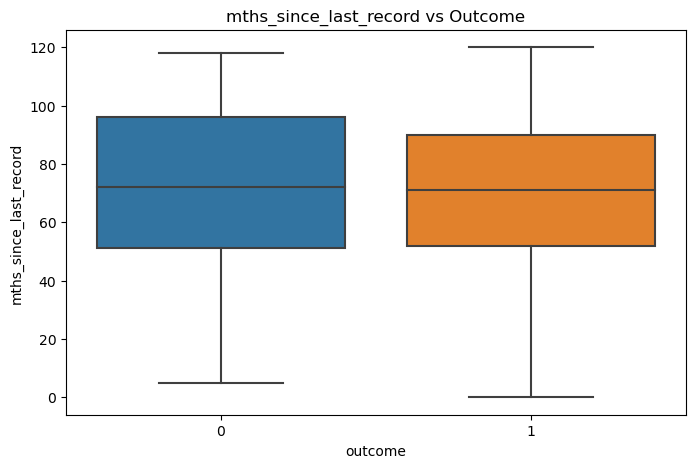

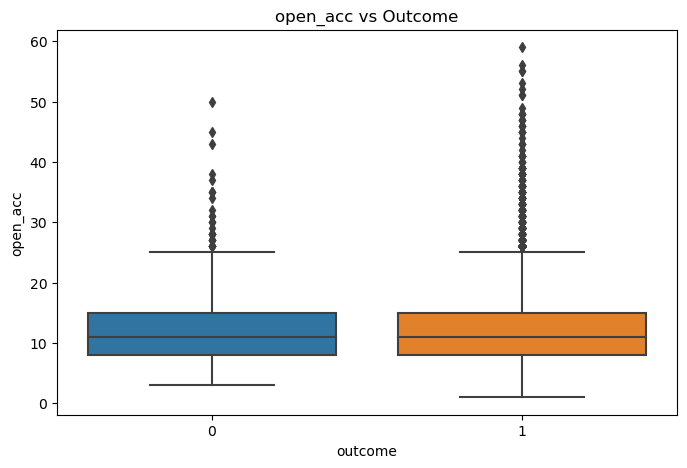

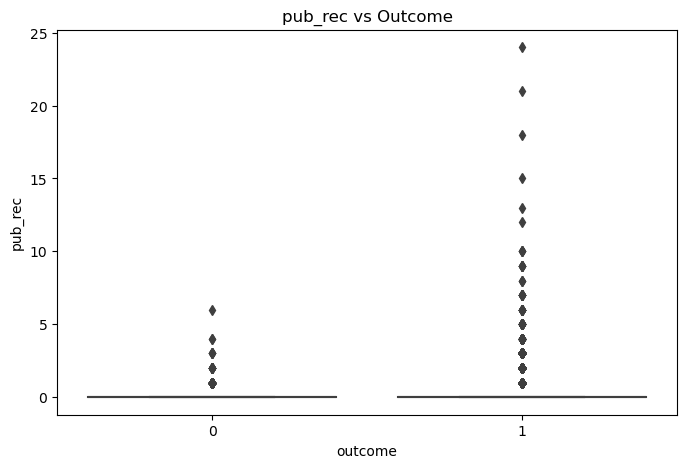

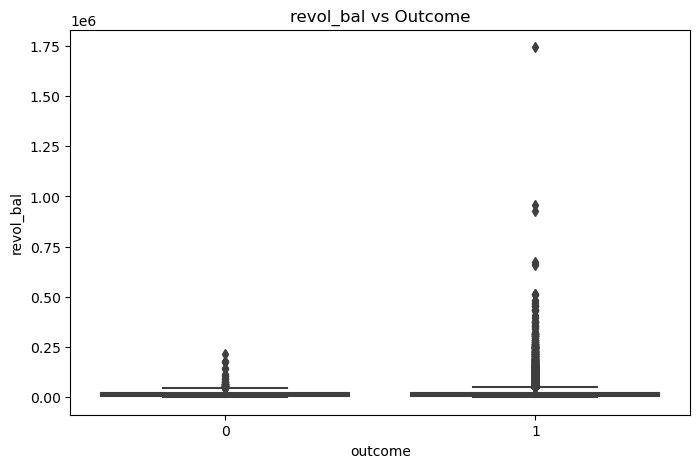

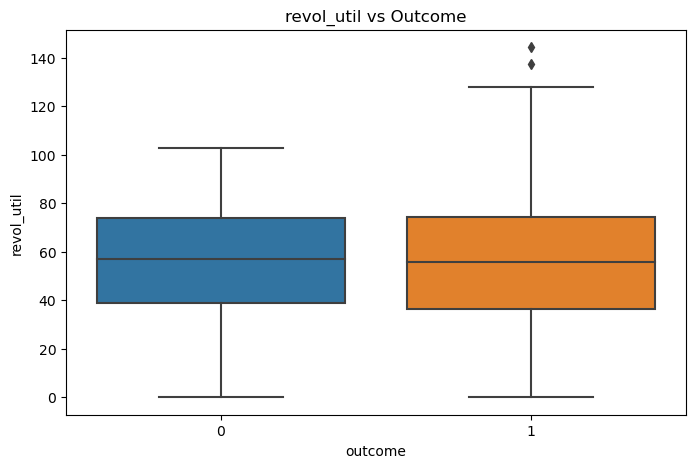

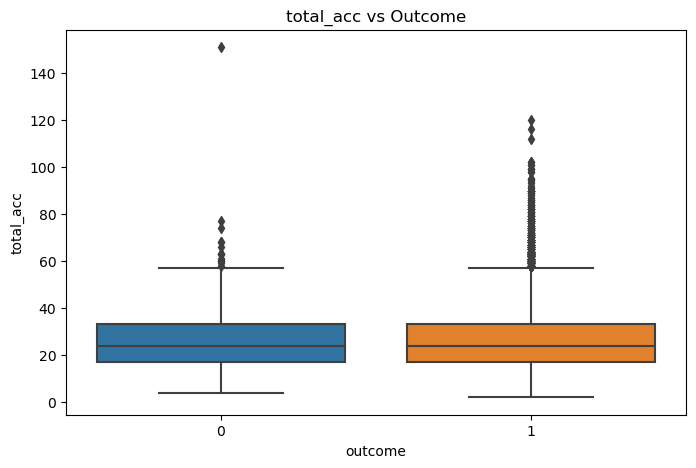

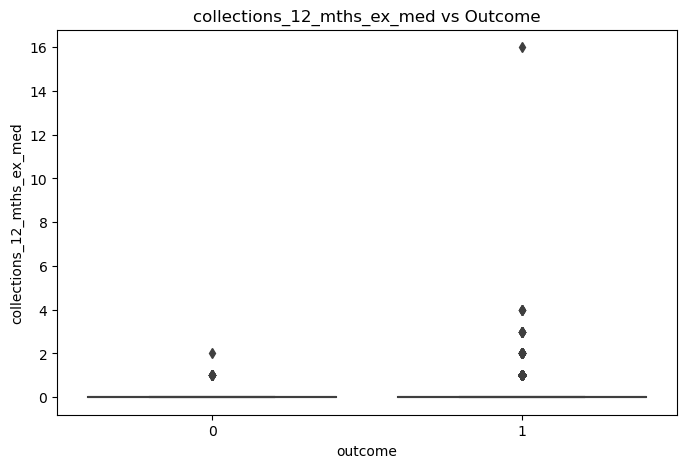

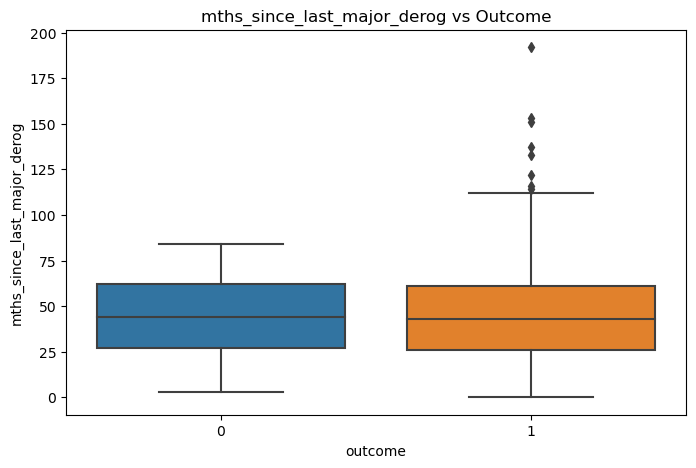

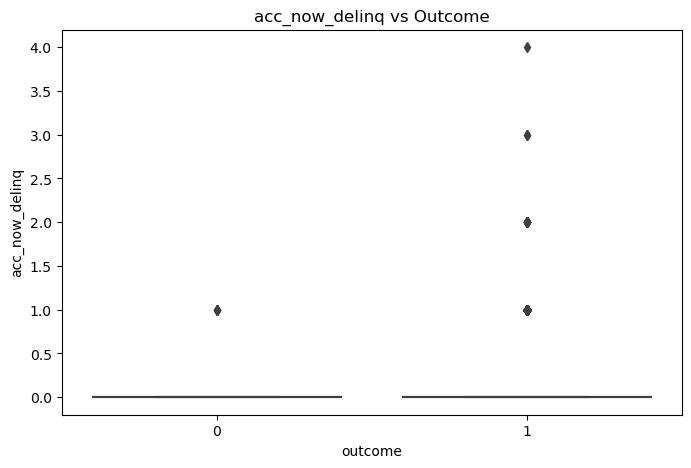

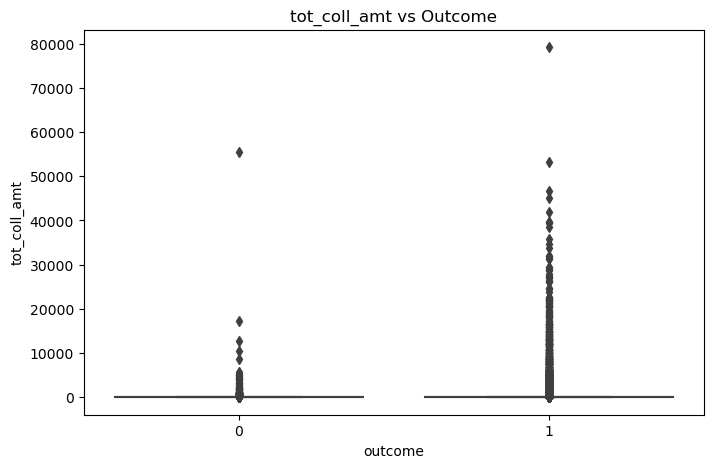

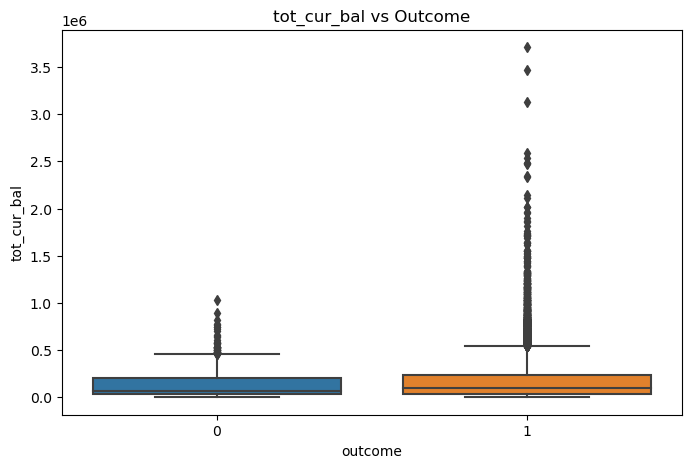

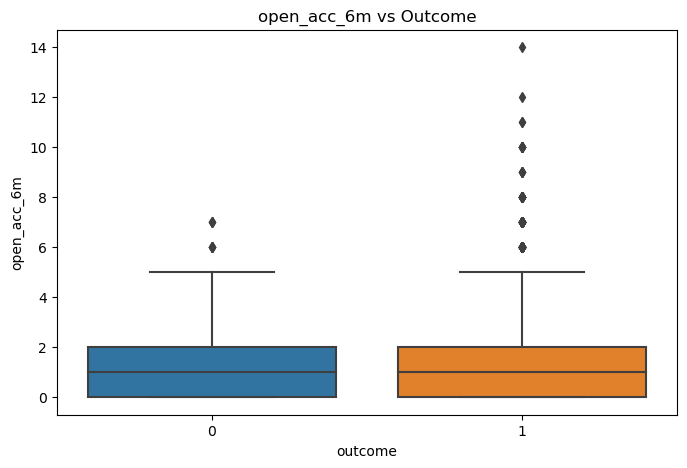

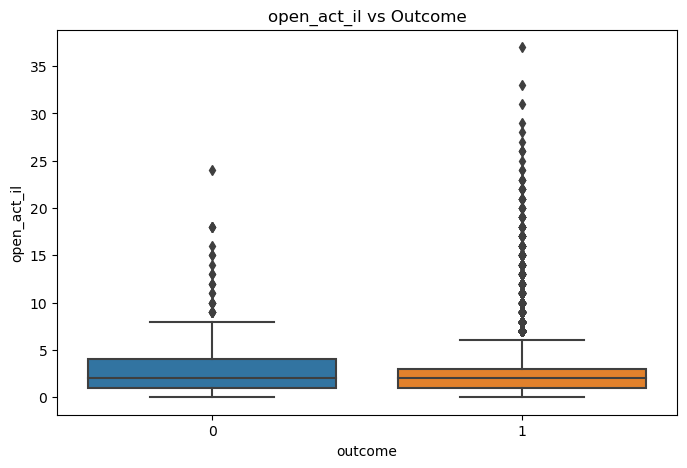

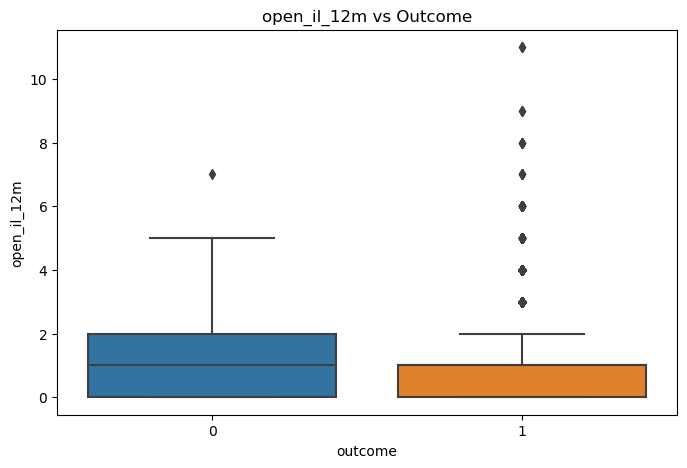

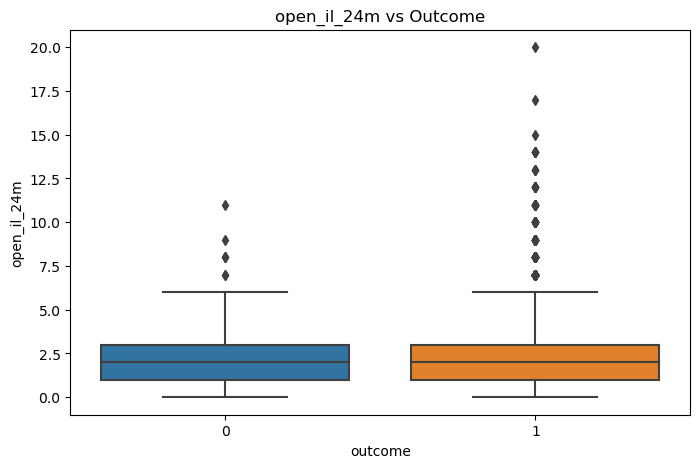

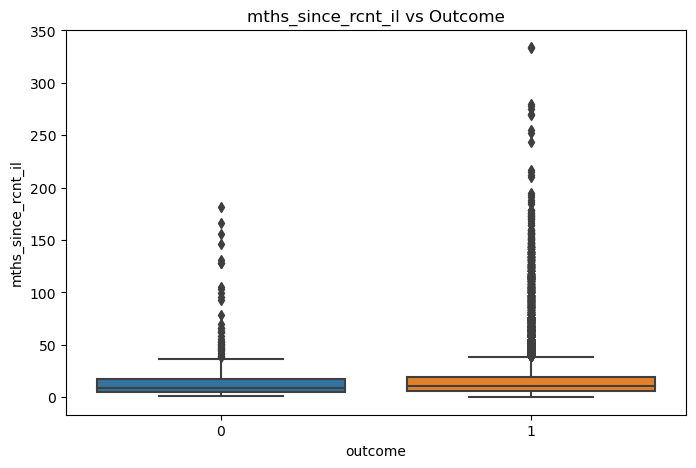

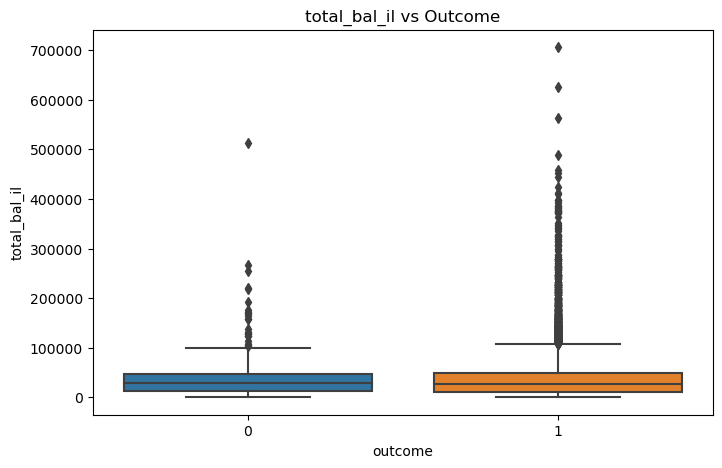

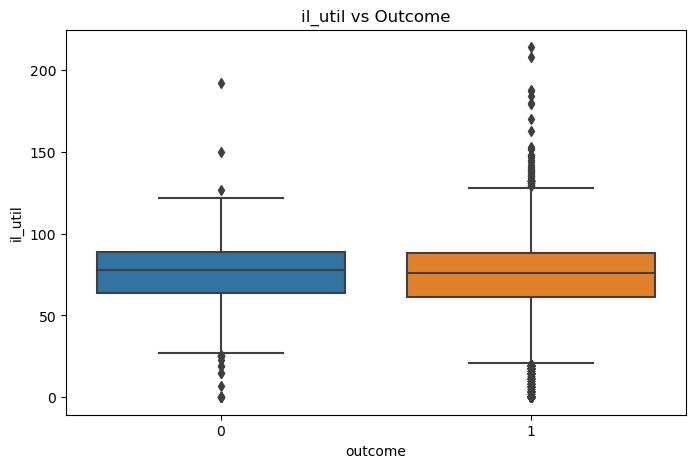

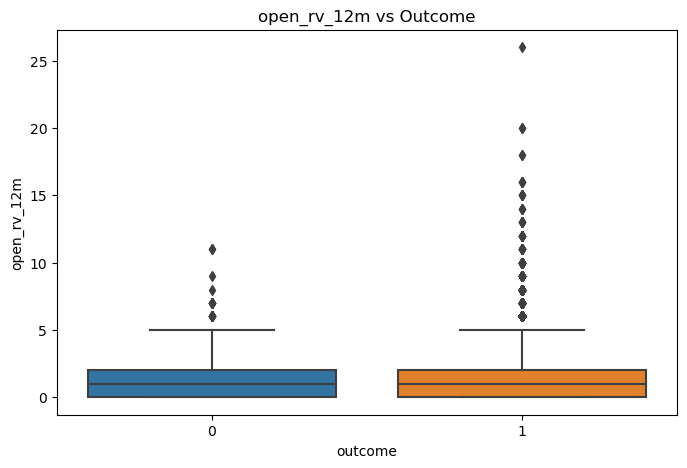

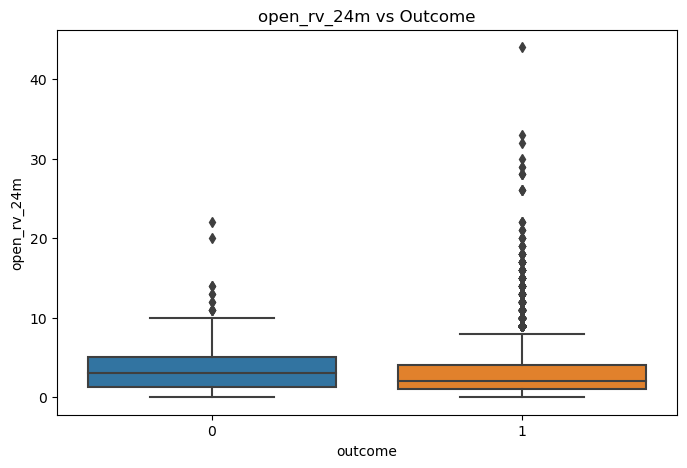

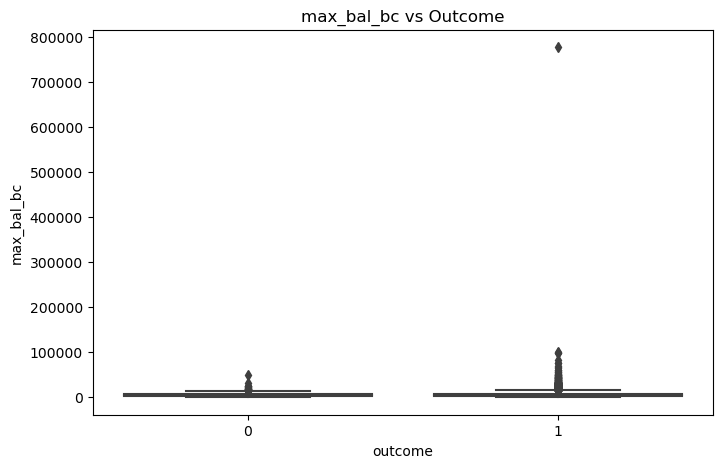

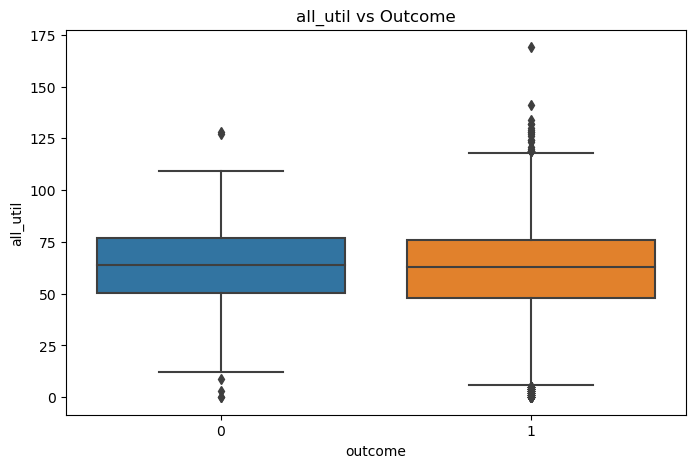

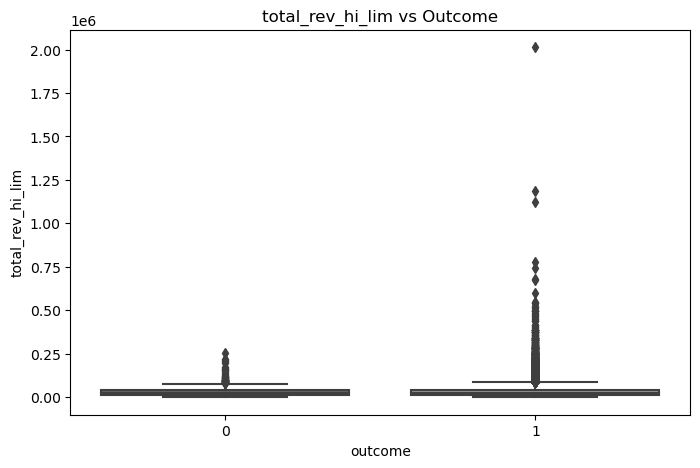

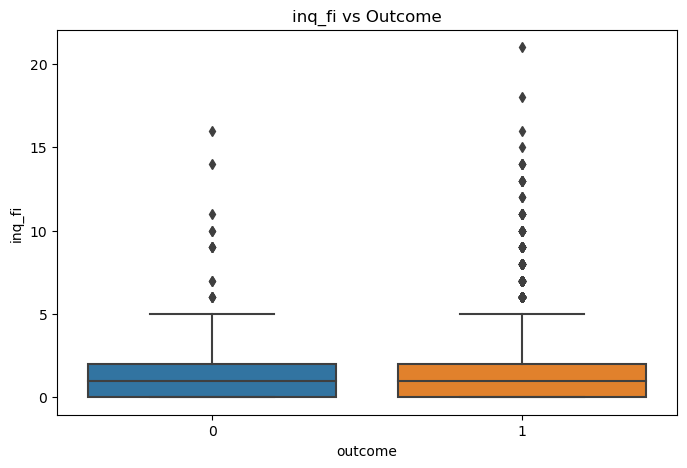

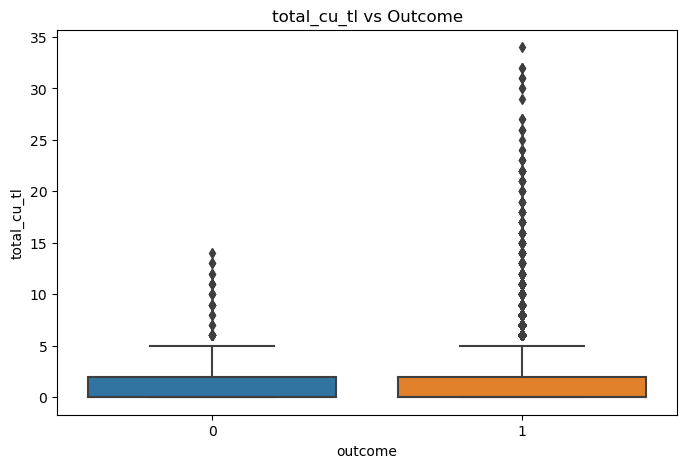

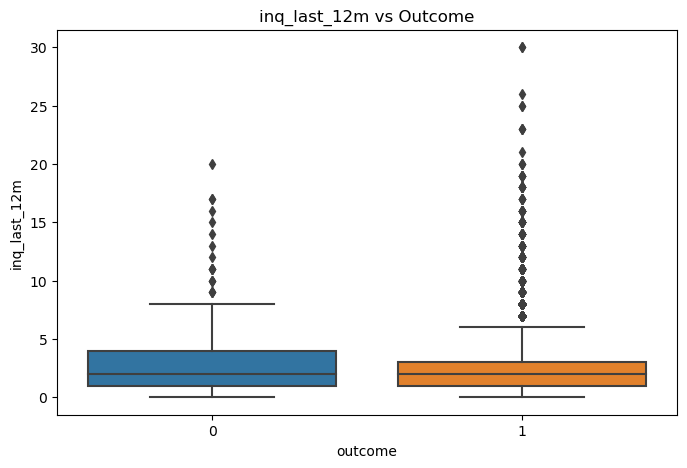

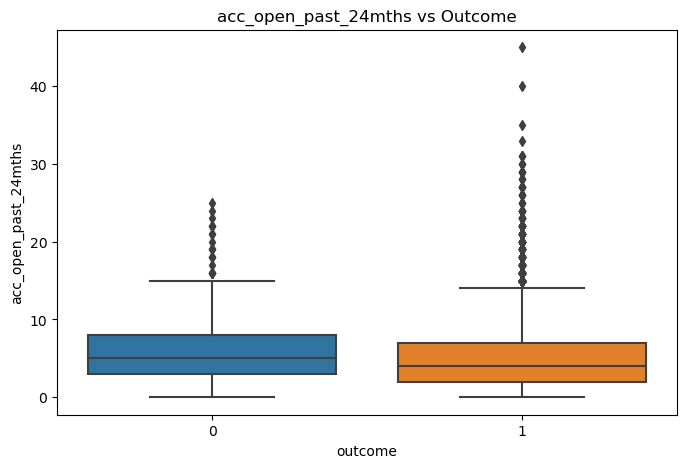

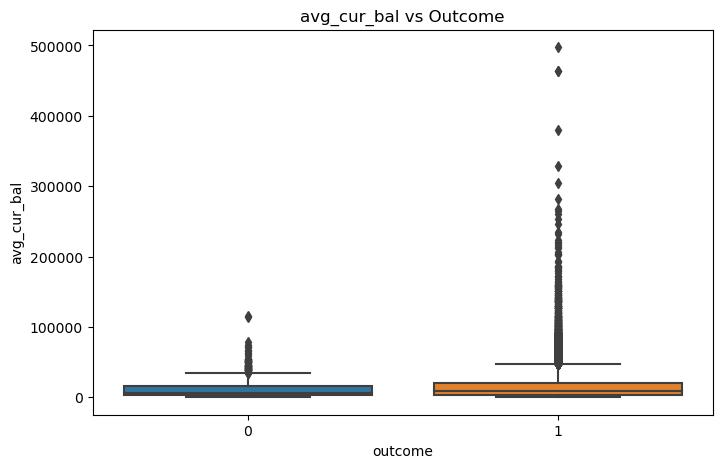

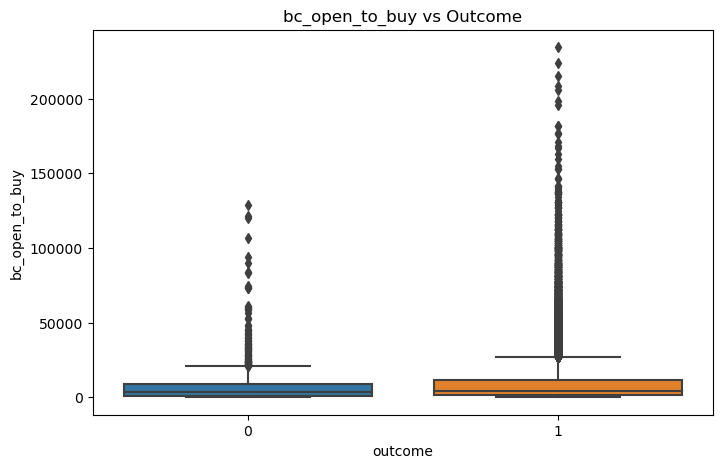

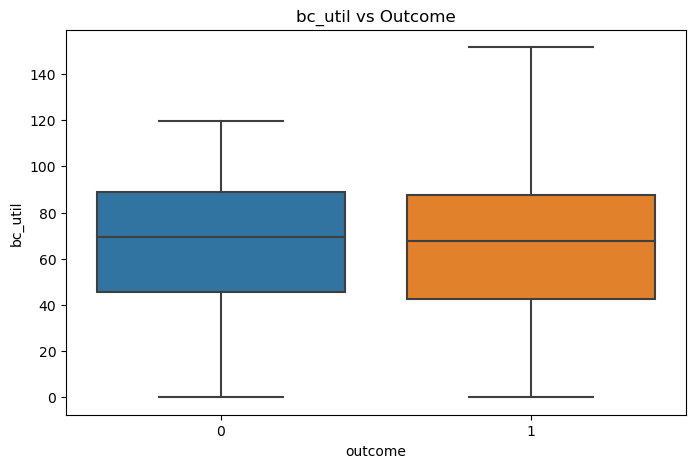

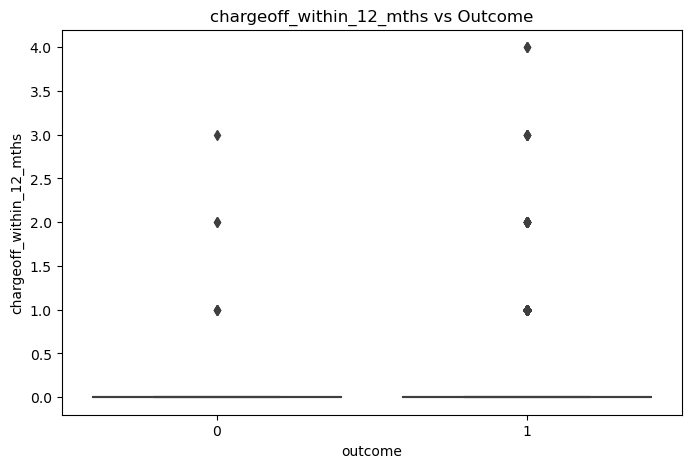

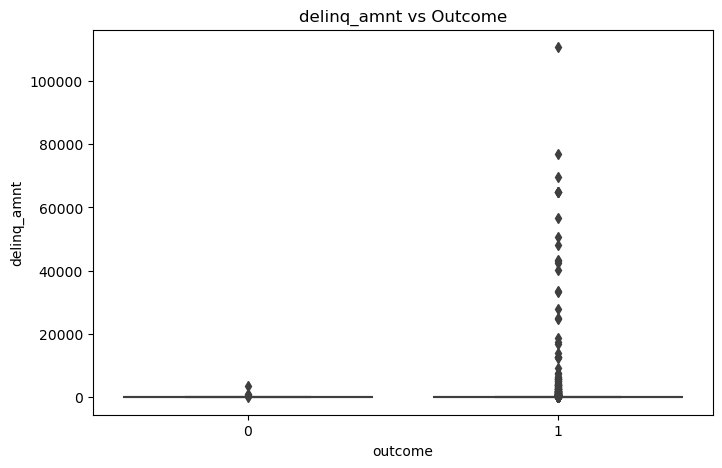

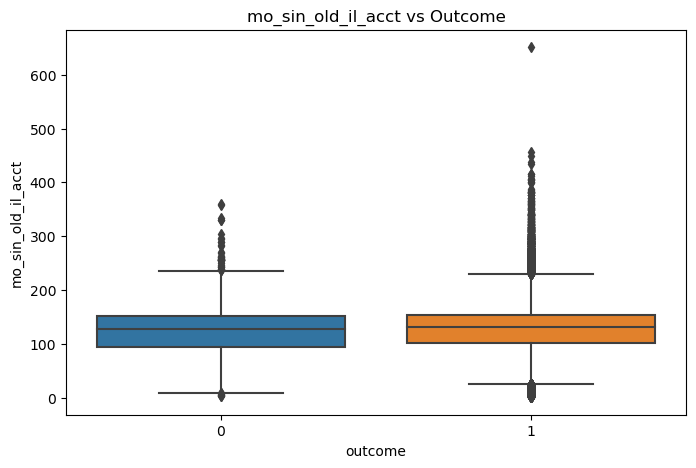

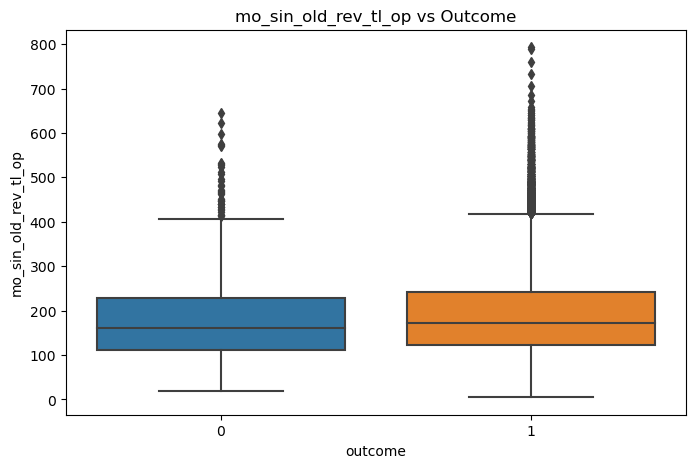

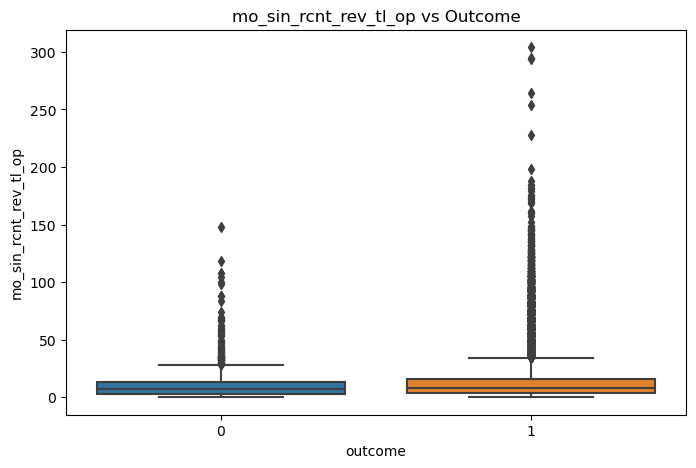

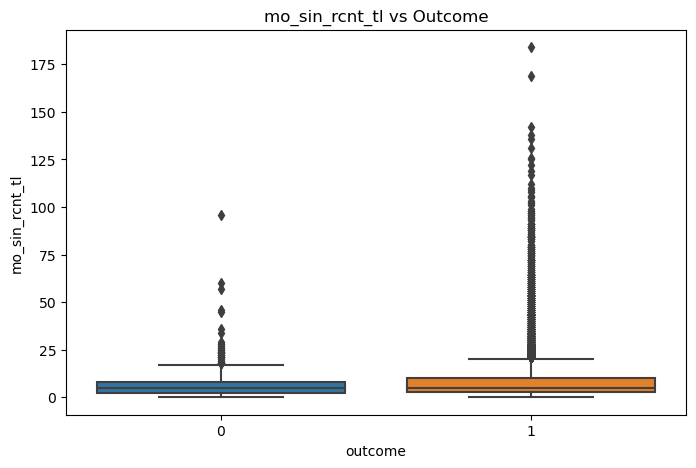

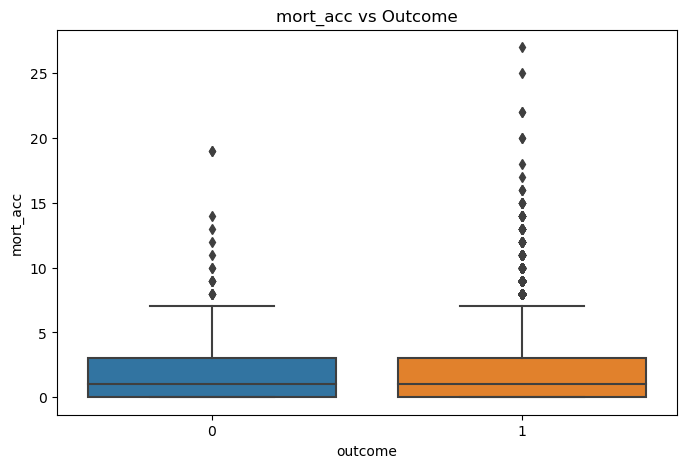

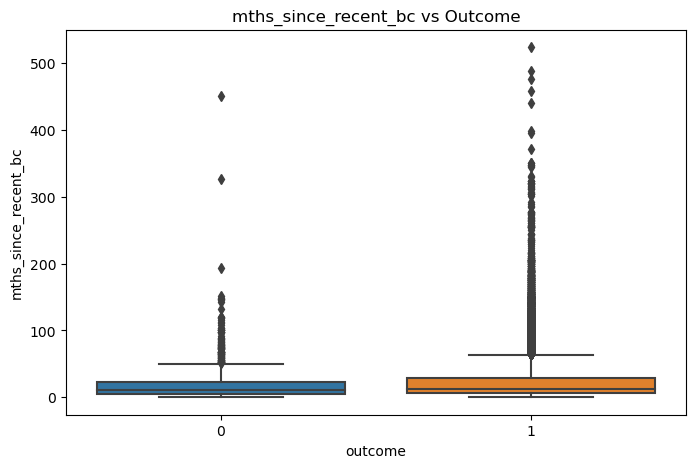

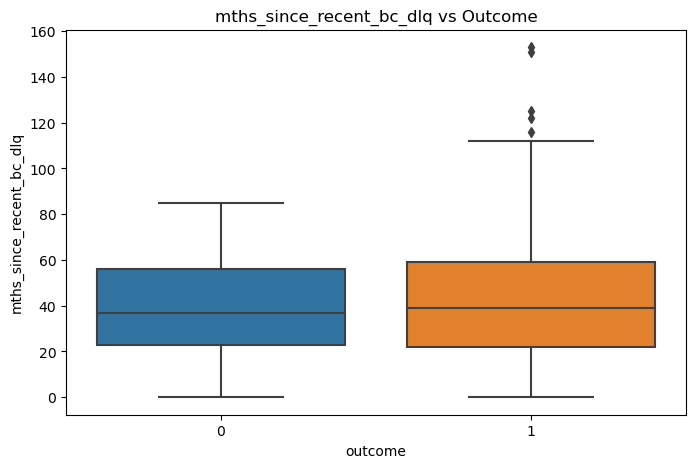

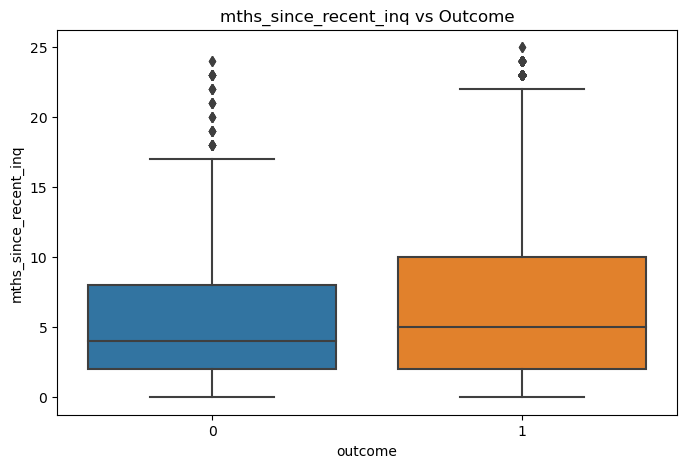

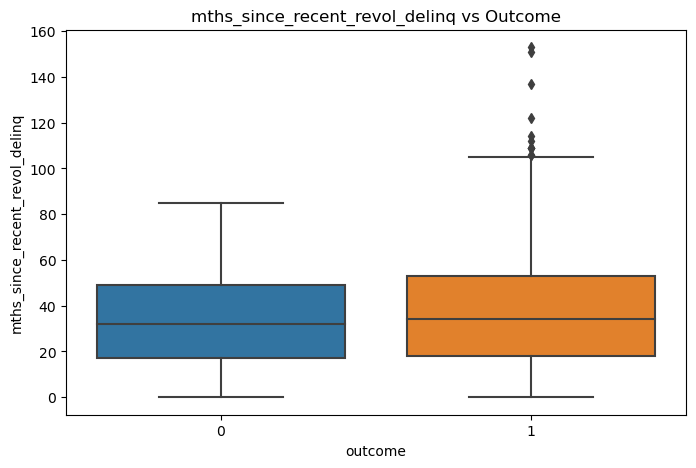

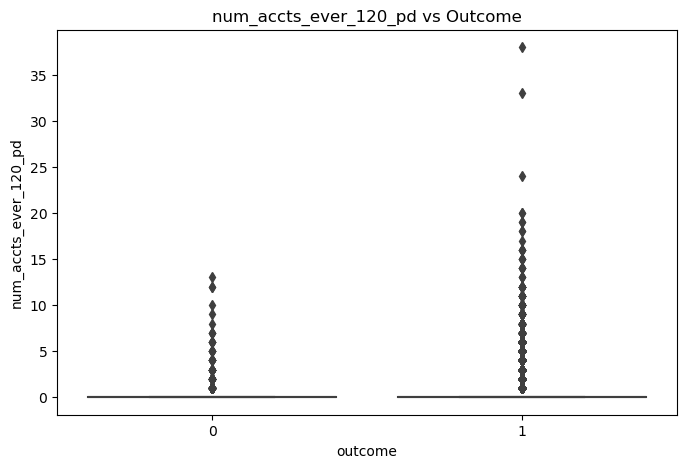

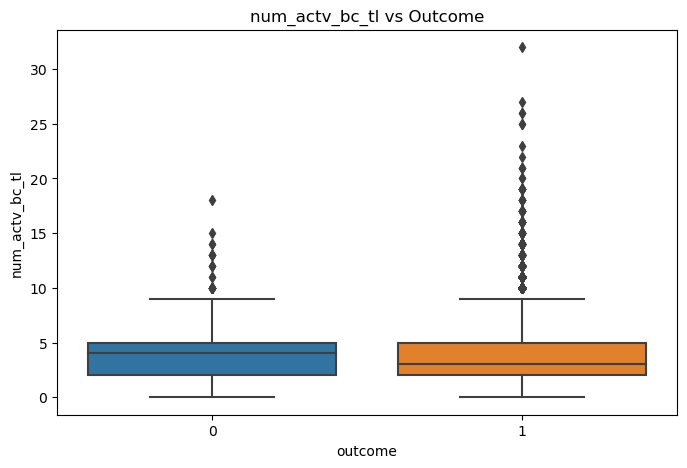

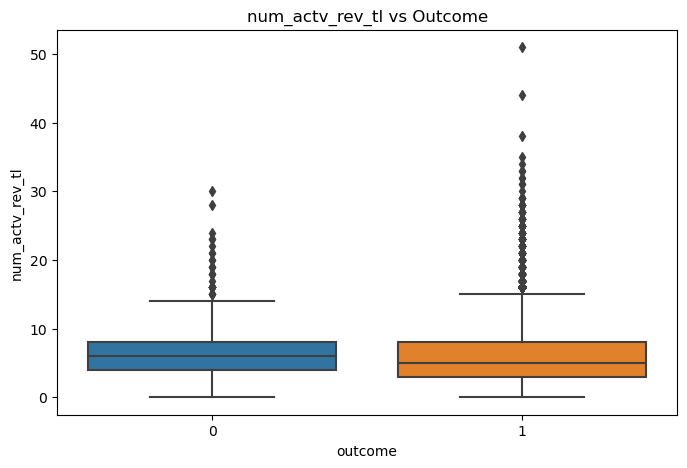

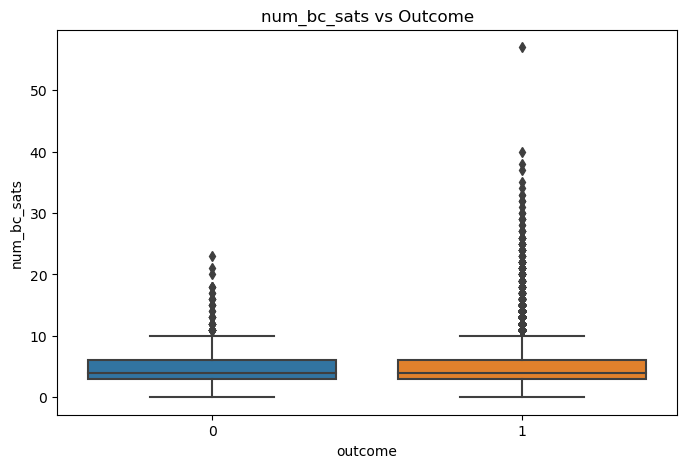

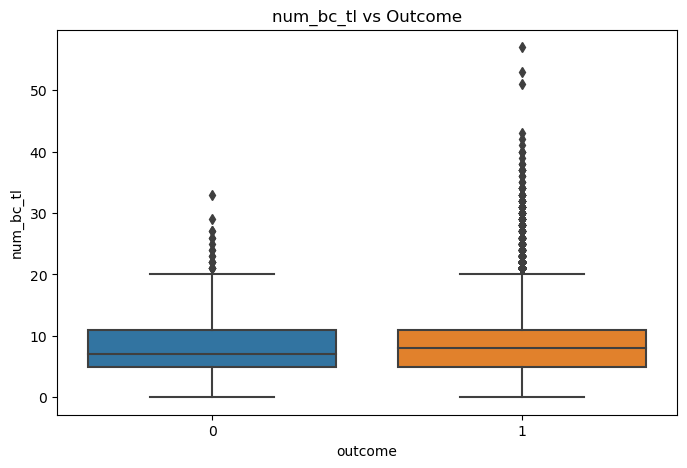

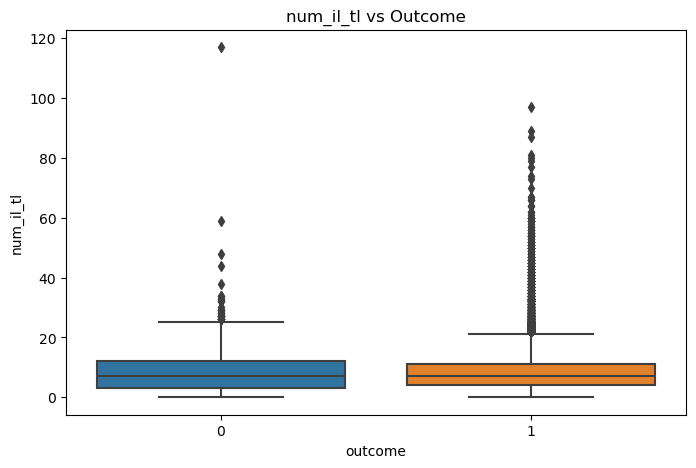

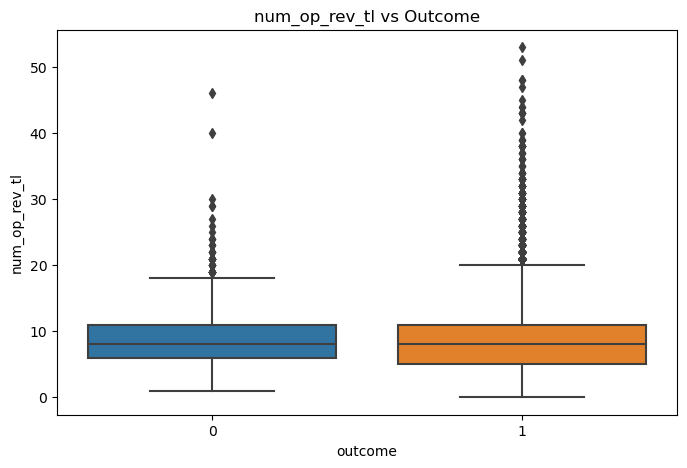

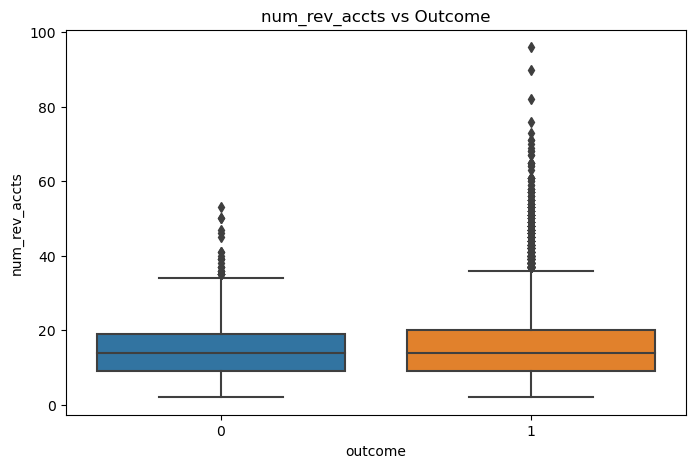

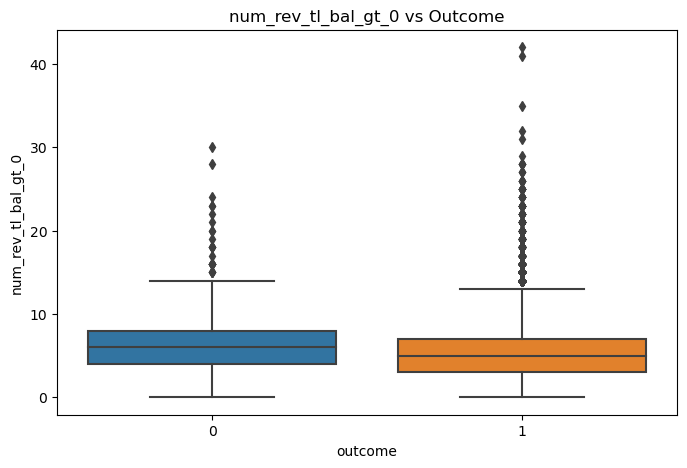

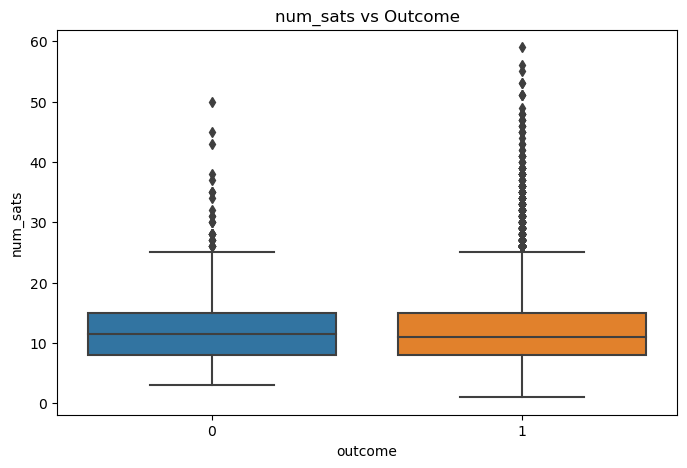

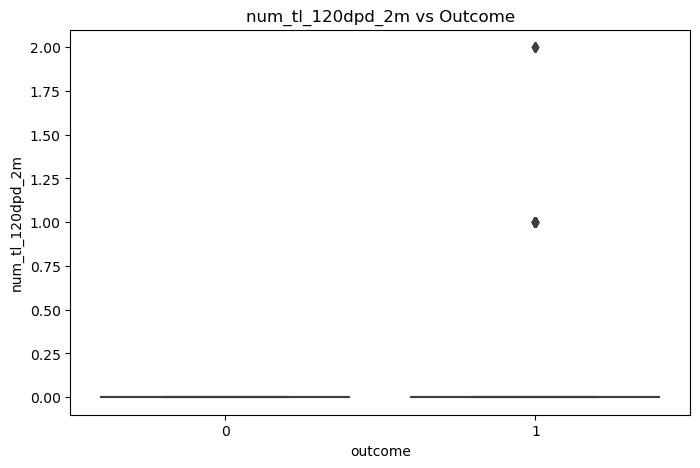

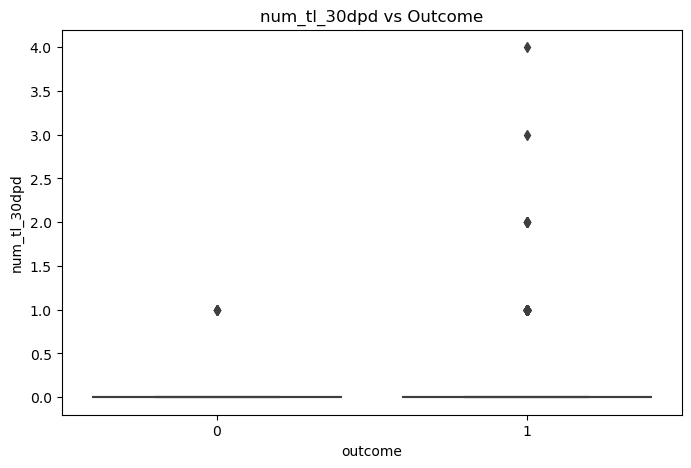

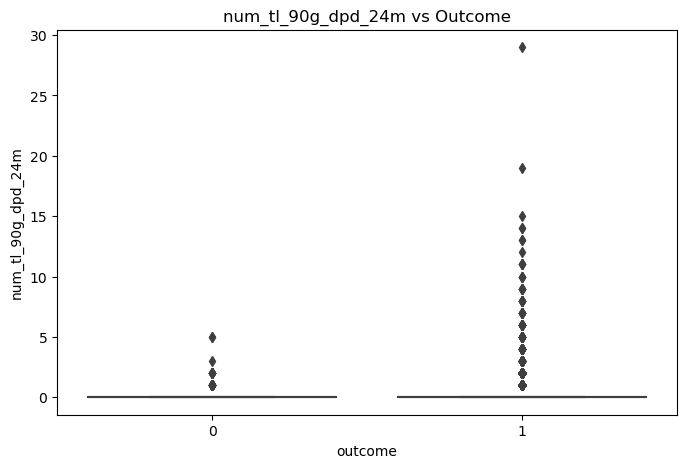

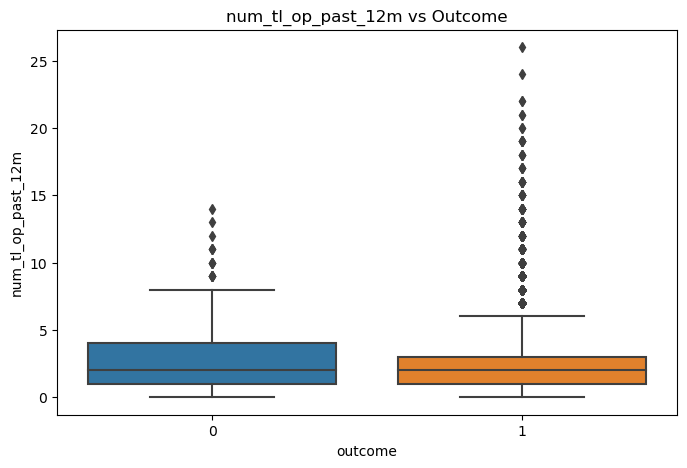

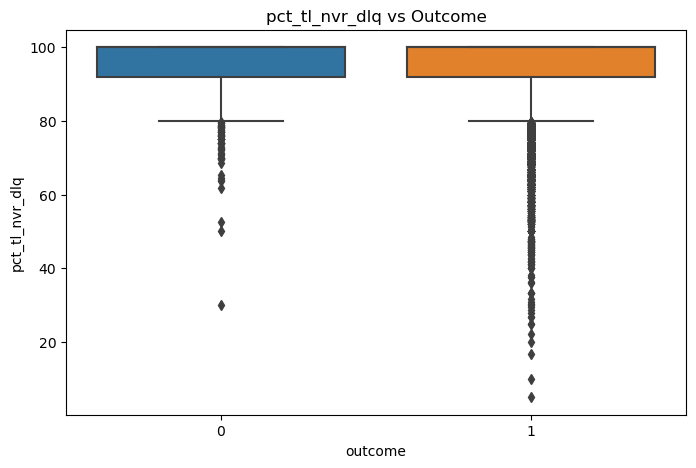

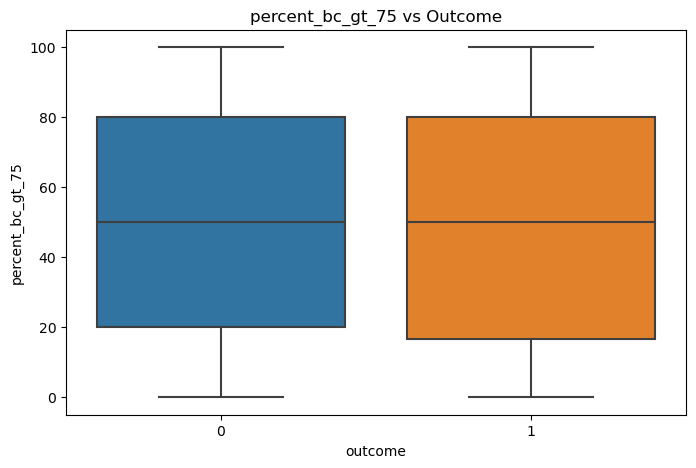

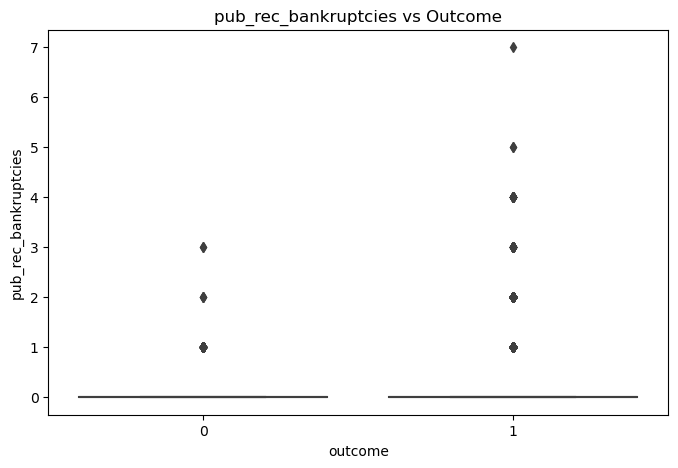

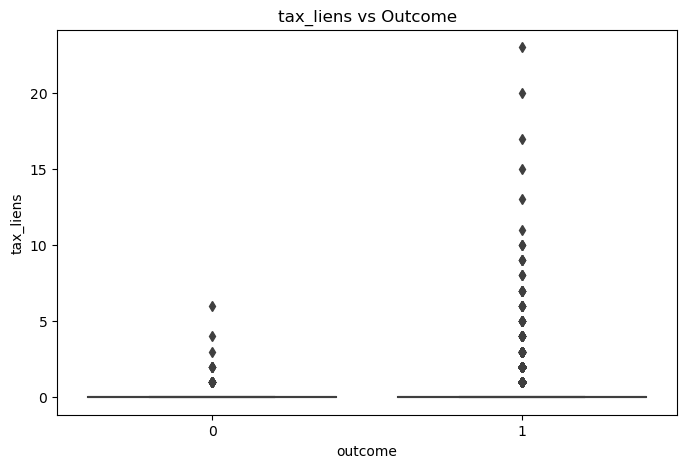

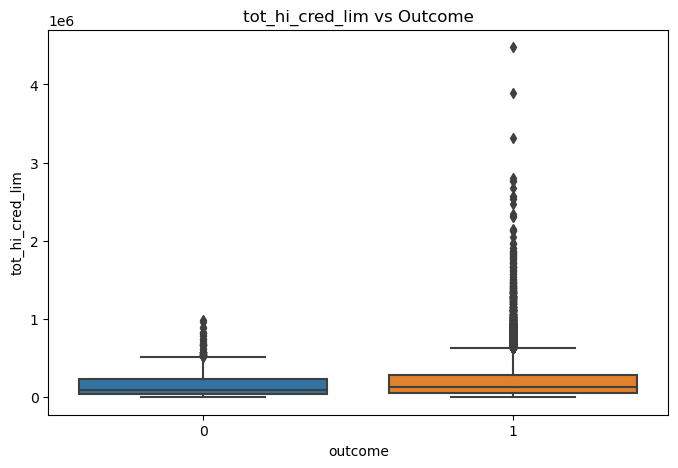

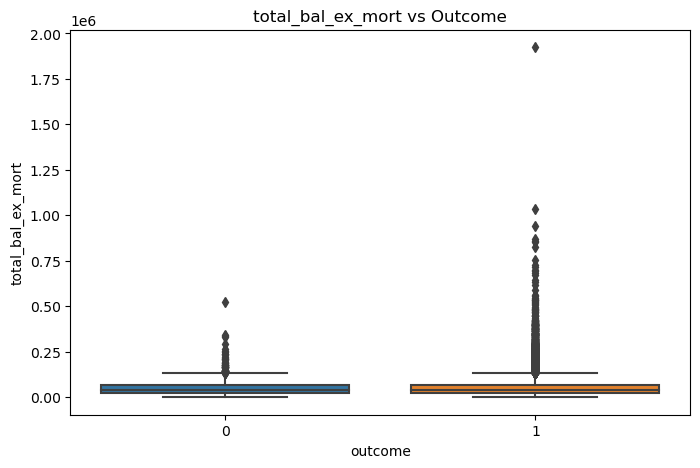

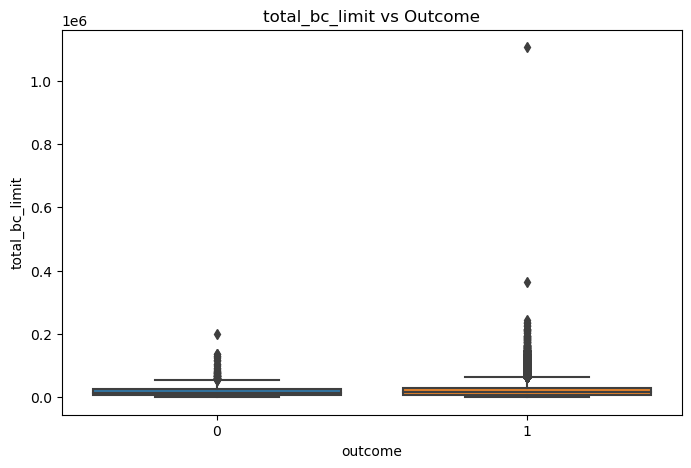

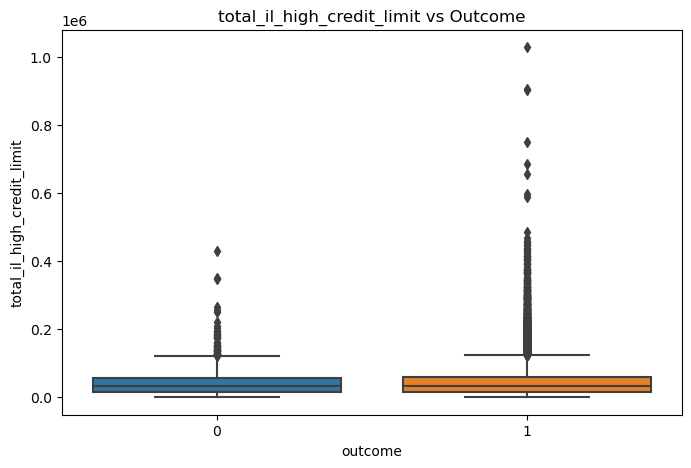

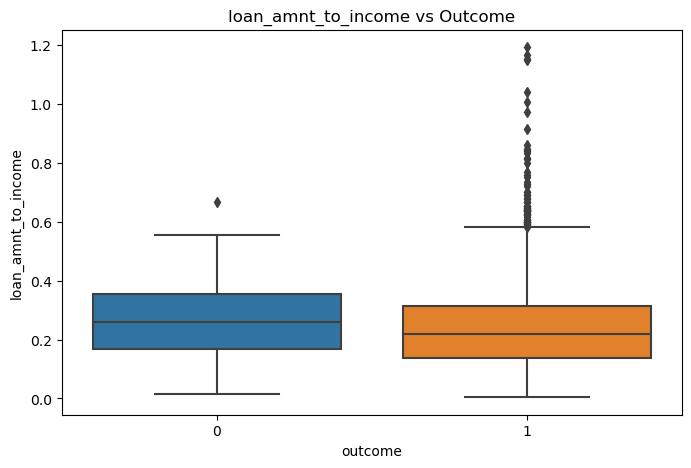

In [56]:
# Relationship between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')
    plt.show()



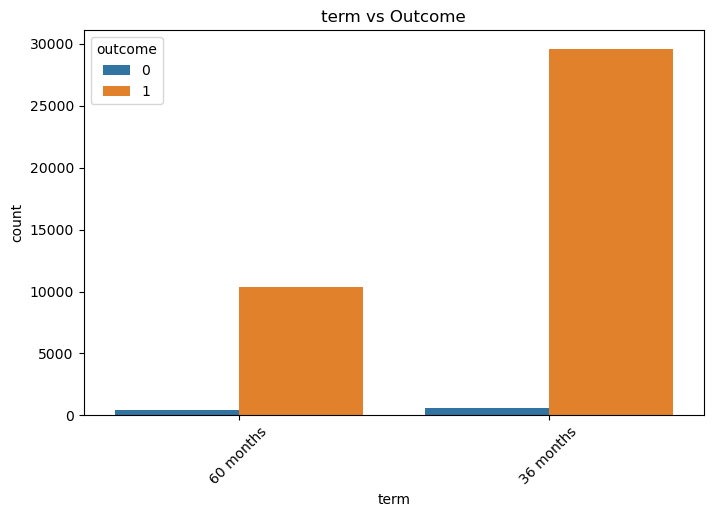

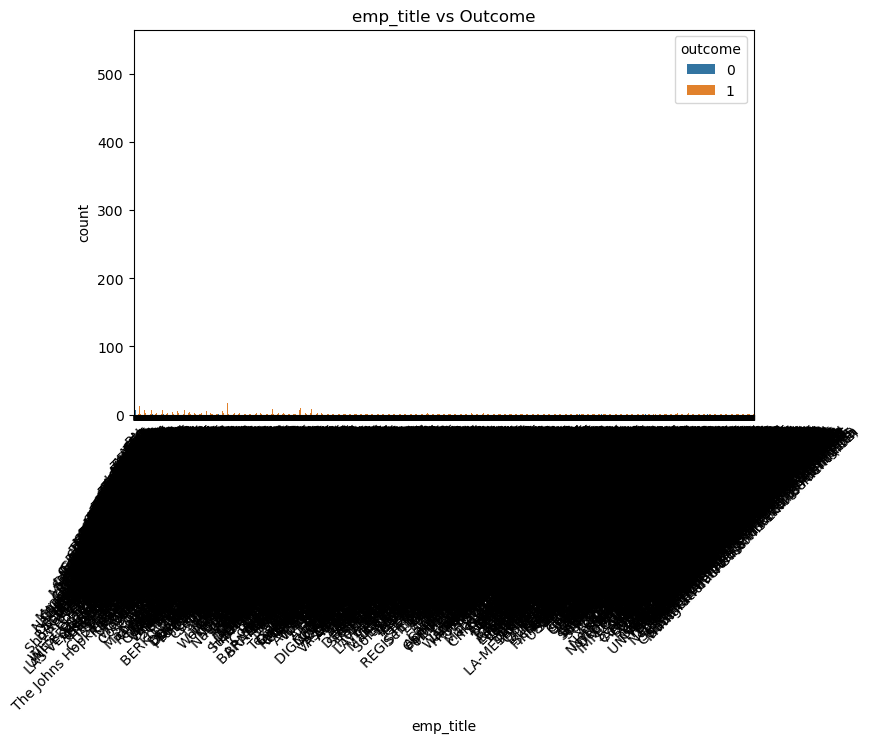

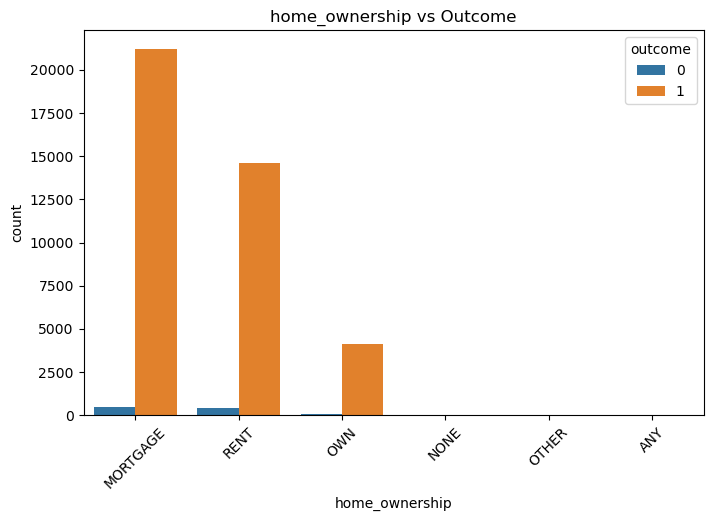

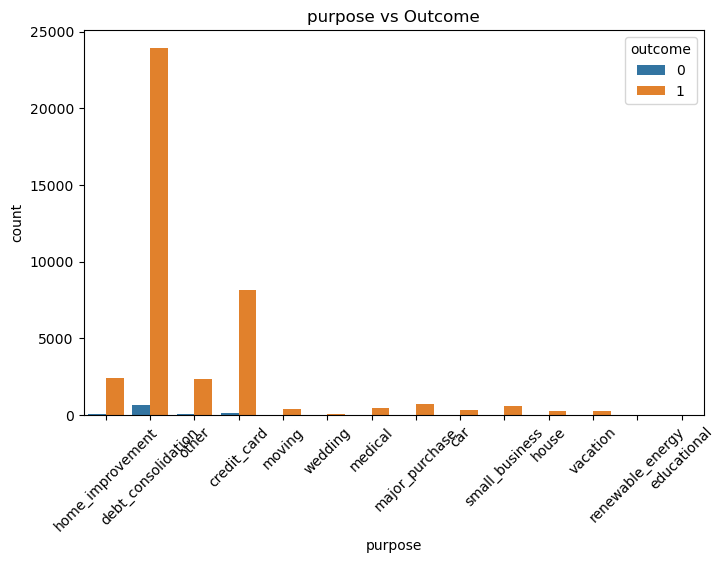

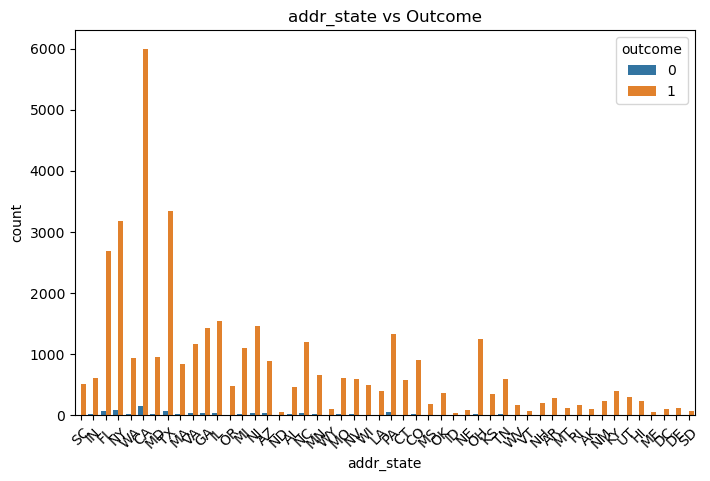

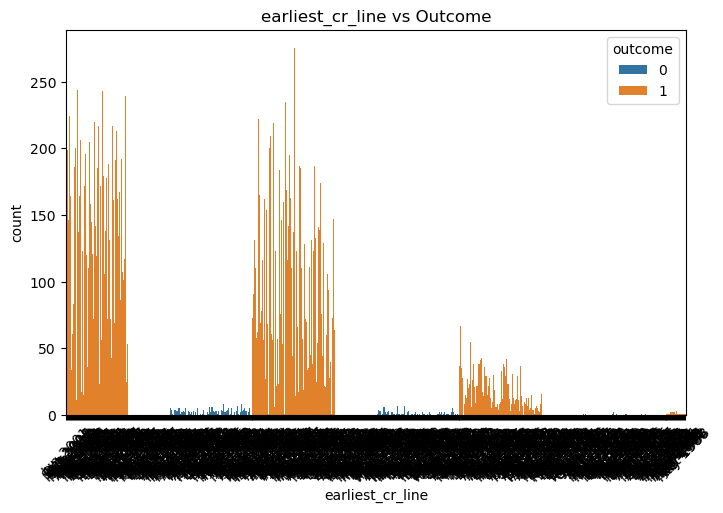

In [57]:
# Relationship between categorical features and target variable
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='outcome', data=df)
    plt.title(f'{feature} vs Outcome')
    plt.xticks(rotation=45)
    plt.show()

## Correlation analysis <a id='cat'></a>

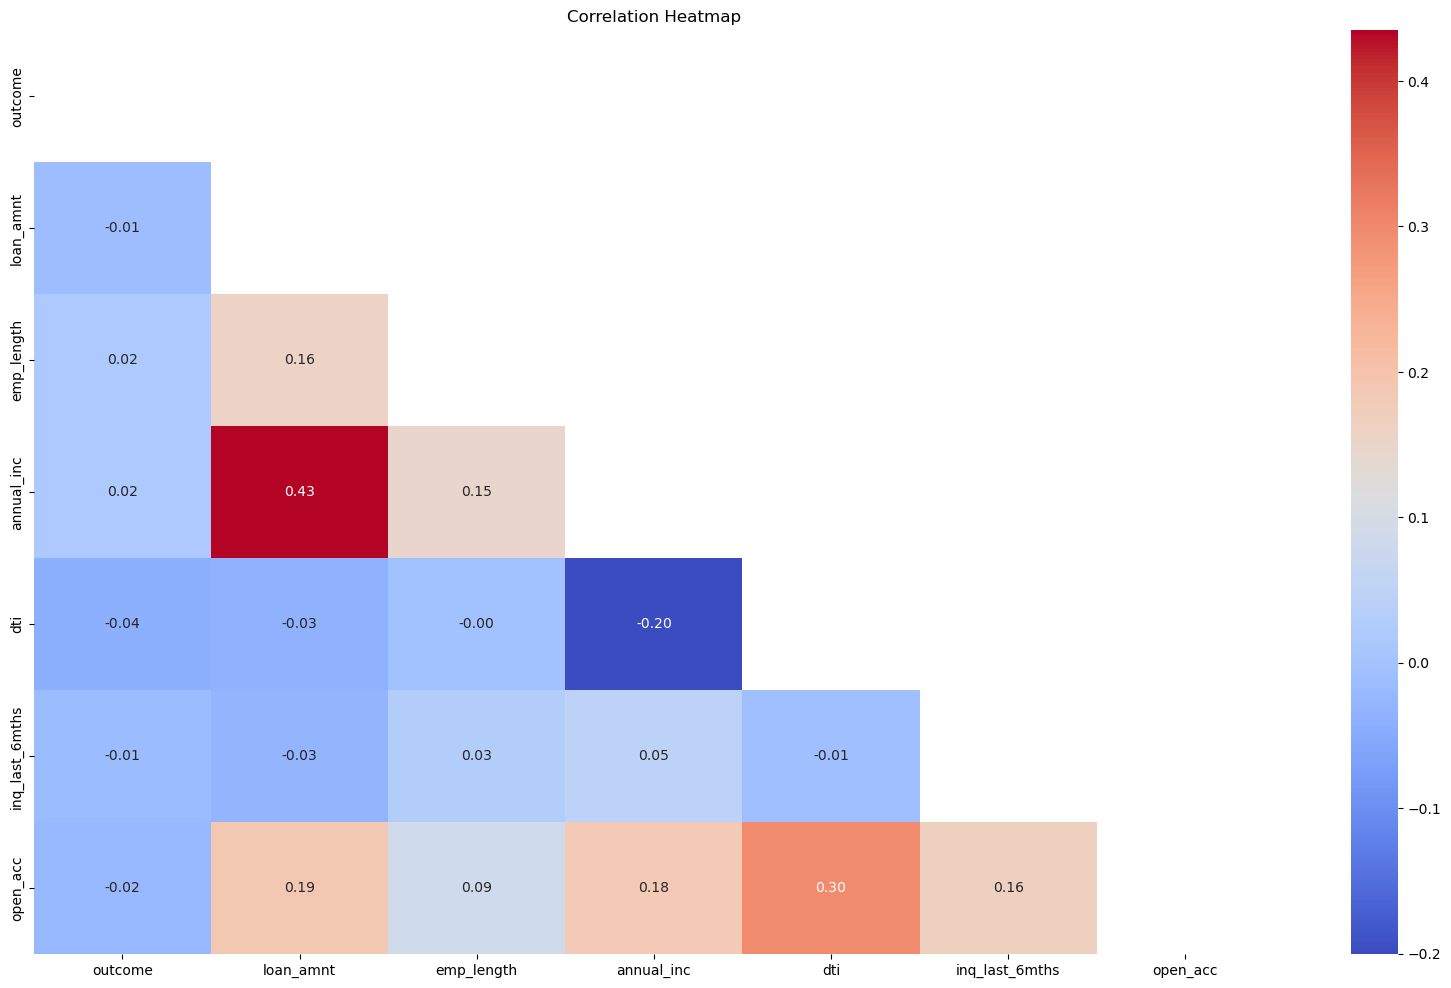

In [60]:
# Create a correlation heatmap
# Select relevant columns
numerical_columns = ['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc']
columns_of_interest = ['outcome'] + numerical_columns
data = df[columns_of_interest]


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix above it shows that there is a strong correlation between annual income and loan amount. This tells me that the more an individual earns the more like they are to loan a higher amount.  Surprsingly there is minimal correlation between annual income and the outcome of the loan, therefore the amount of money an individual earns doesn't correlate to whether they will default on the loan payments.

## Conclusions <a id='conc'></a>

### By running some exploratory data analysis I was able to discover that 
- Only 1000 people in the data defaulted in the dataset.
- Those who defualted on their loan repayments have a higher mean loan to income ratio.
- Those who defaulted on their loan repayments are more likely to have a 60 month loan.
- Those who have been in employment for 10 years have taken out the most loans and those in employment for less than a year are more likely to default on their loan.